# ASSIGNMENT 2 NOTES, EXPLANATION & EVIDENCE

## Project Plans:
**MUSTs**
- Demontsrate use and knowledge Python
- Connect to Spotify API
- Store information into a file

**SHOULDs**
- Allow User to input artist and retrieve data relating to said artist
    - Display name, genres, artist following, albums, top tracks, recommend 5 songs, etc.

**COULDs**
- Immediately display name & confirm this is who they wanted to view
- Potentially allow the user to choose what information they want to view instead of automatically?
- Store the entire console output into the file
(These coulds later turned into won'ts due to time pressure and complexity of code)


## Authorisation: Setting up Spotify Developer Credentials

Create/ log in to your Spotify account at ***[Spotify for Developers](https://developer.spotify.com/)***


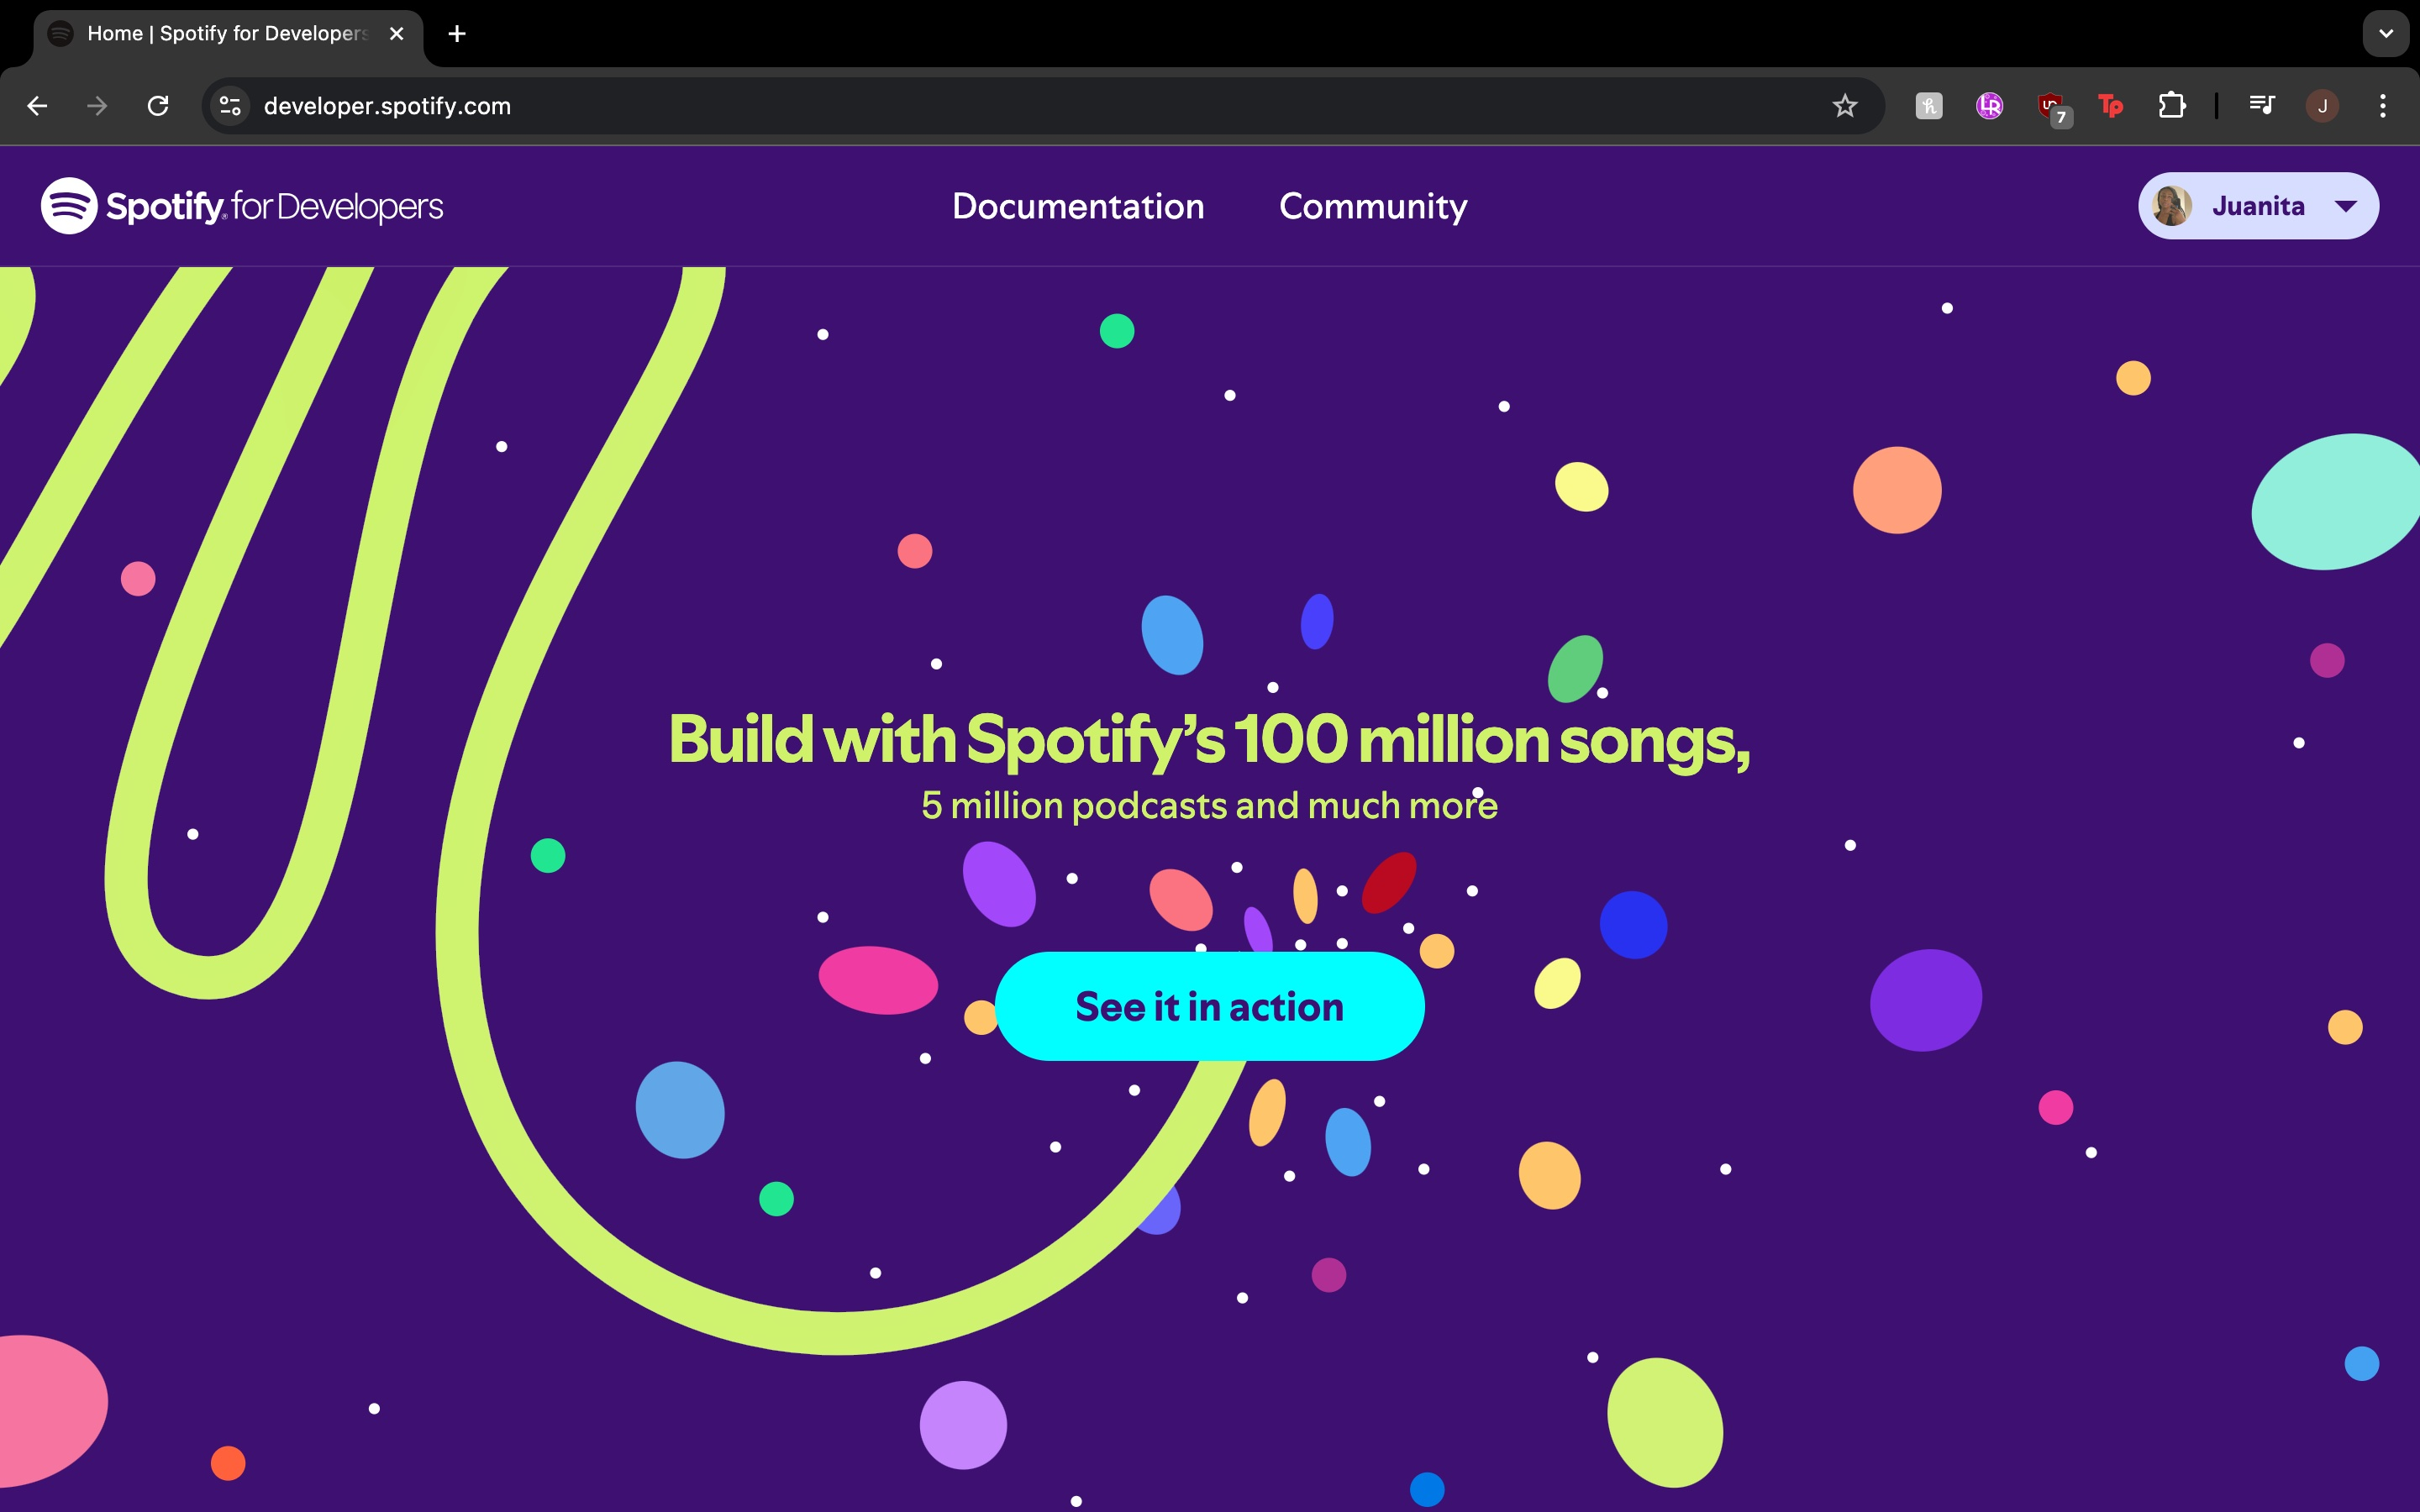

Click on your profile and access the dashboard. Then click ‘Create an app’ to make a new WebApp.

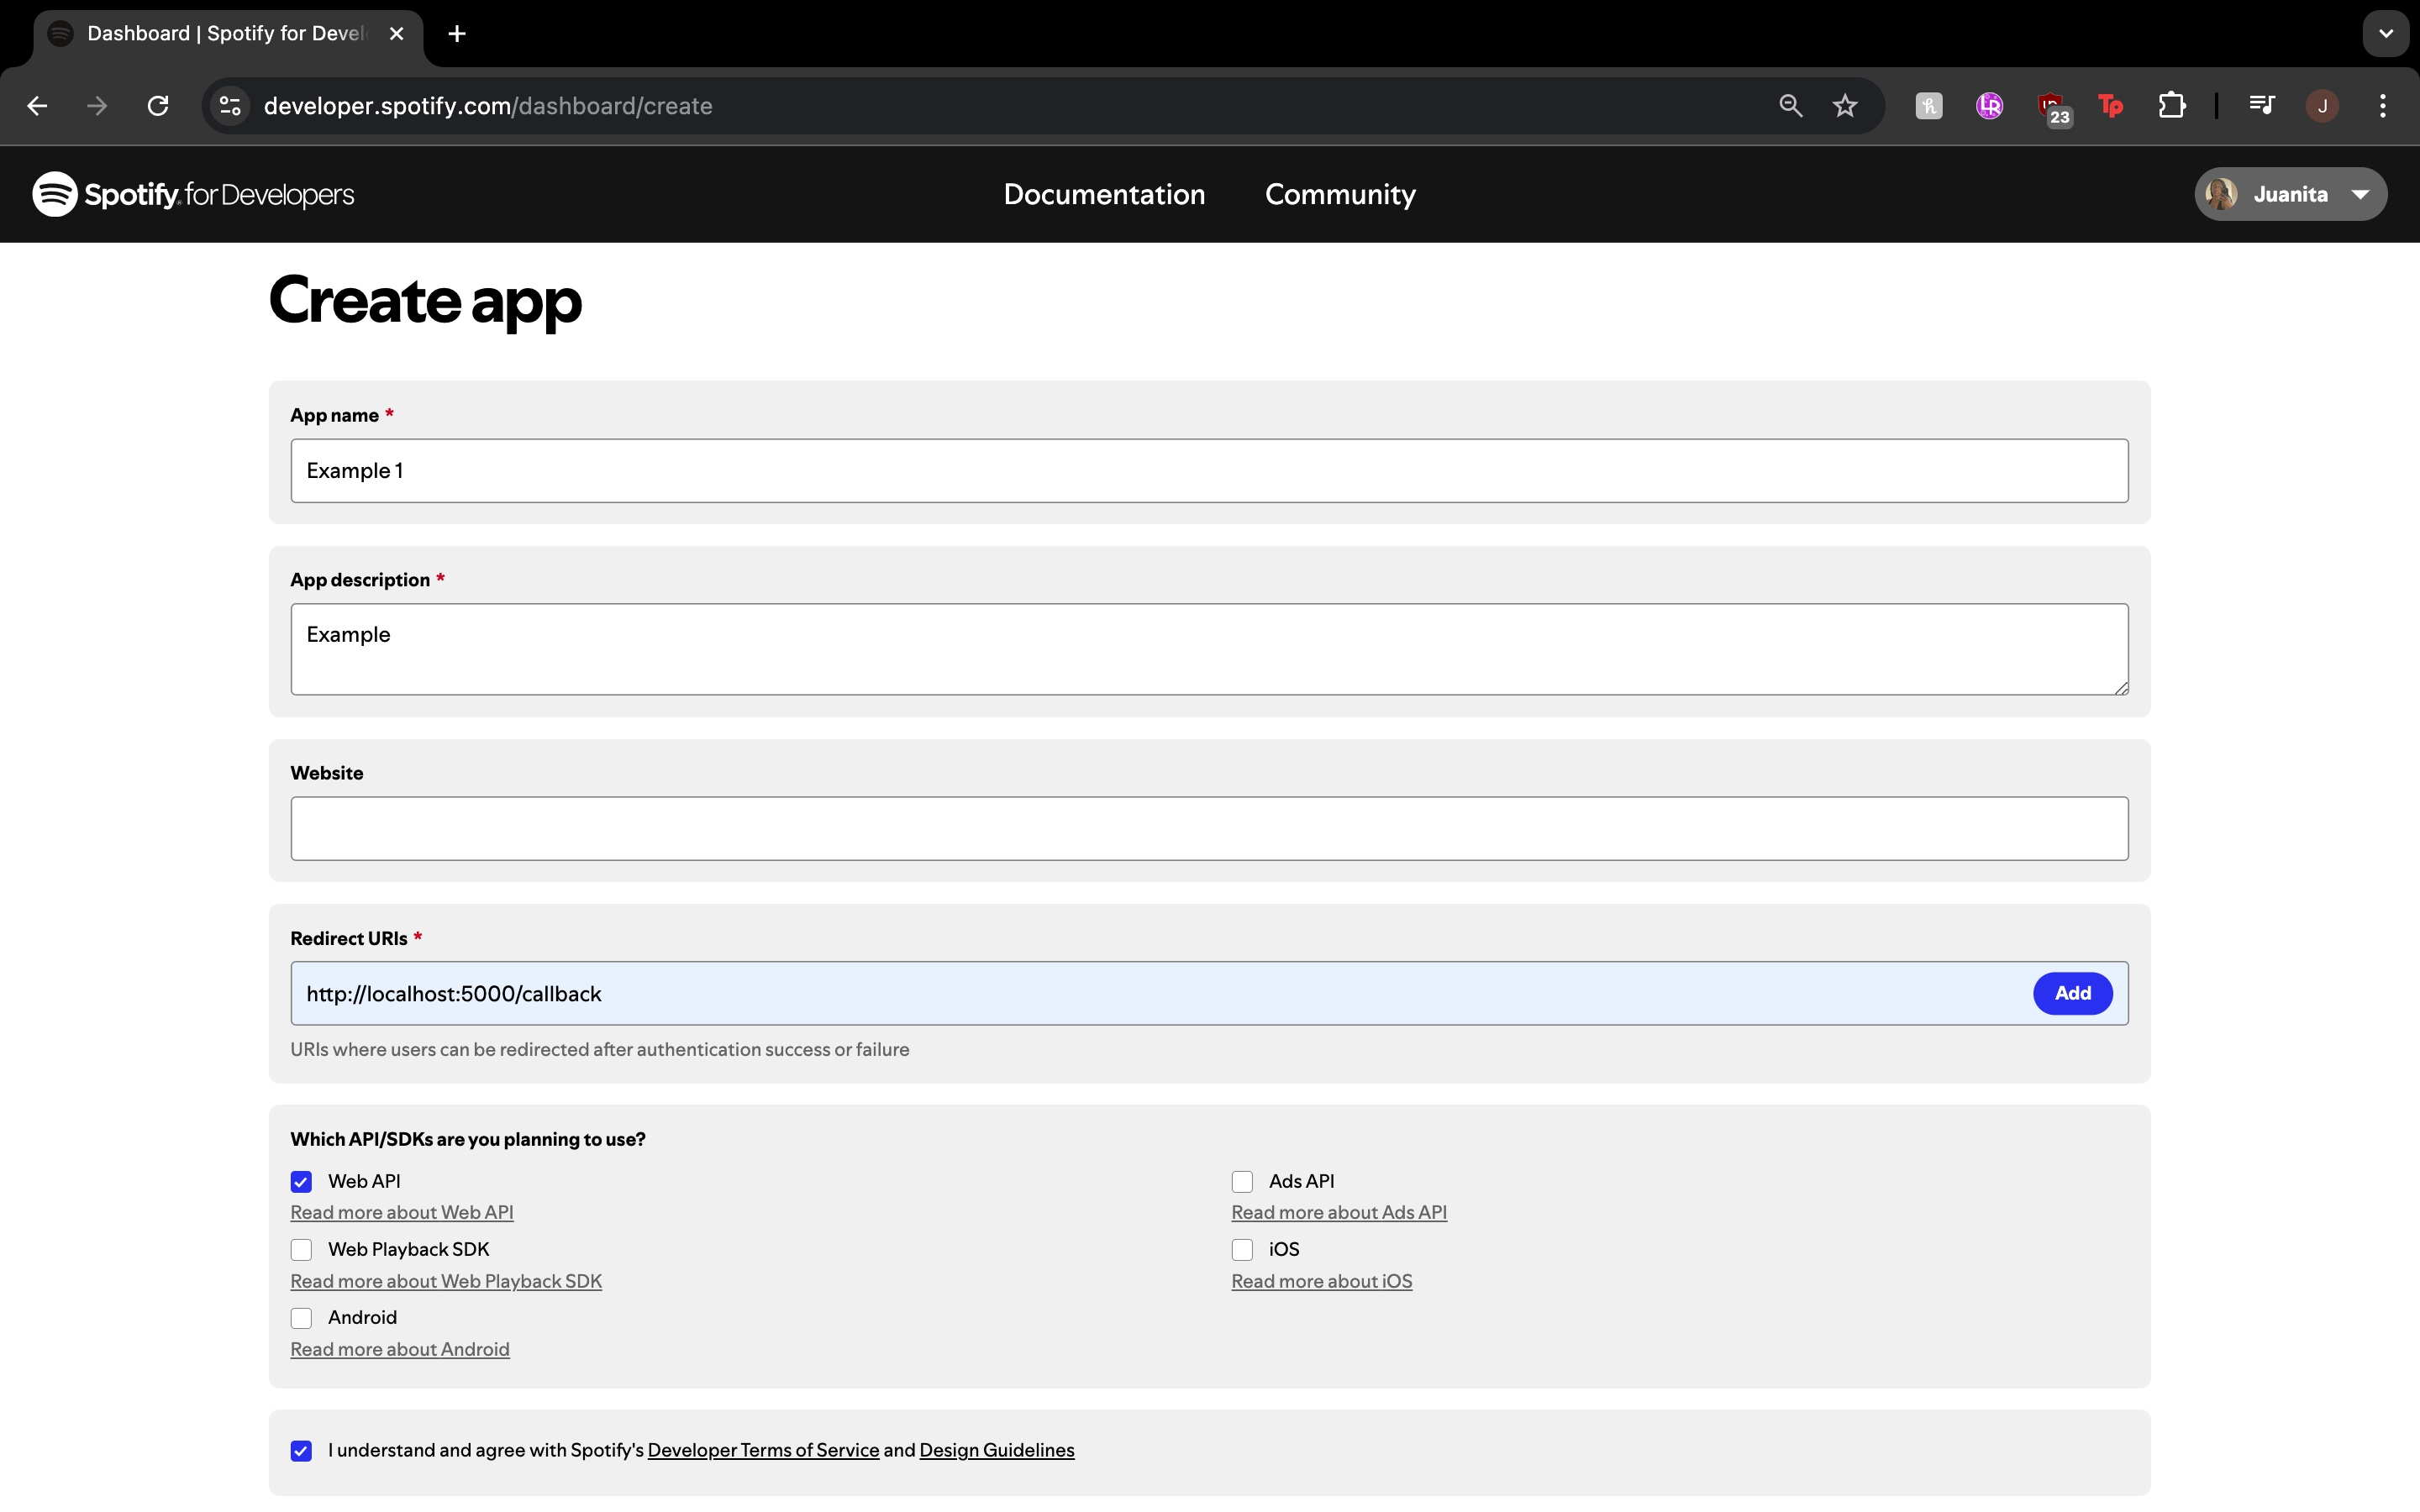

Fill in the required fields (‘App name’, ‘App description’) with whatever you would like. And add a redirect URL, you can use the same as the one in the screenshot. Select WebAPI, agree to the T&Cs and click Save.

Once created, click into the newly created App, click ‘Settings’ in the top right and retrieve your Client ID (similar to a username) and Client Secret (similar to a password).

The Client Secret is something you should ***never*** share with anyone. For the purpose of demonstrating your set up, I have shown the details.


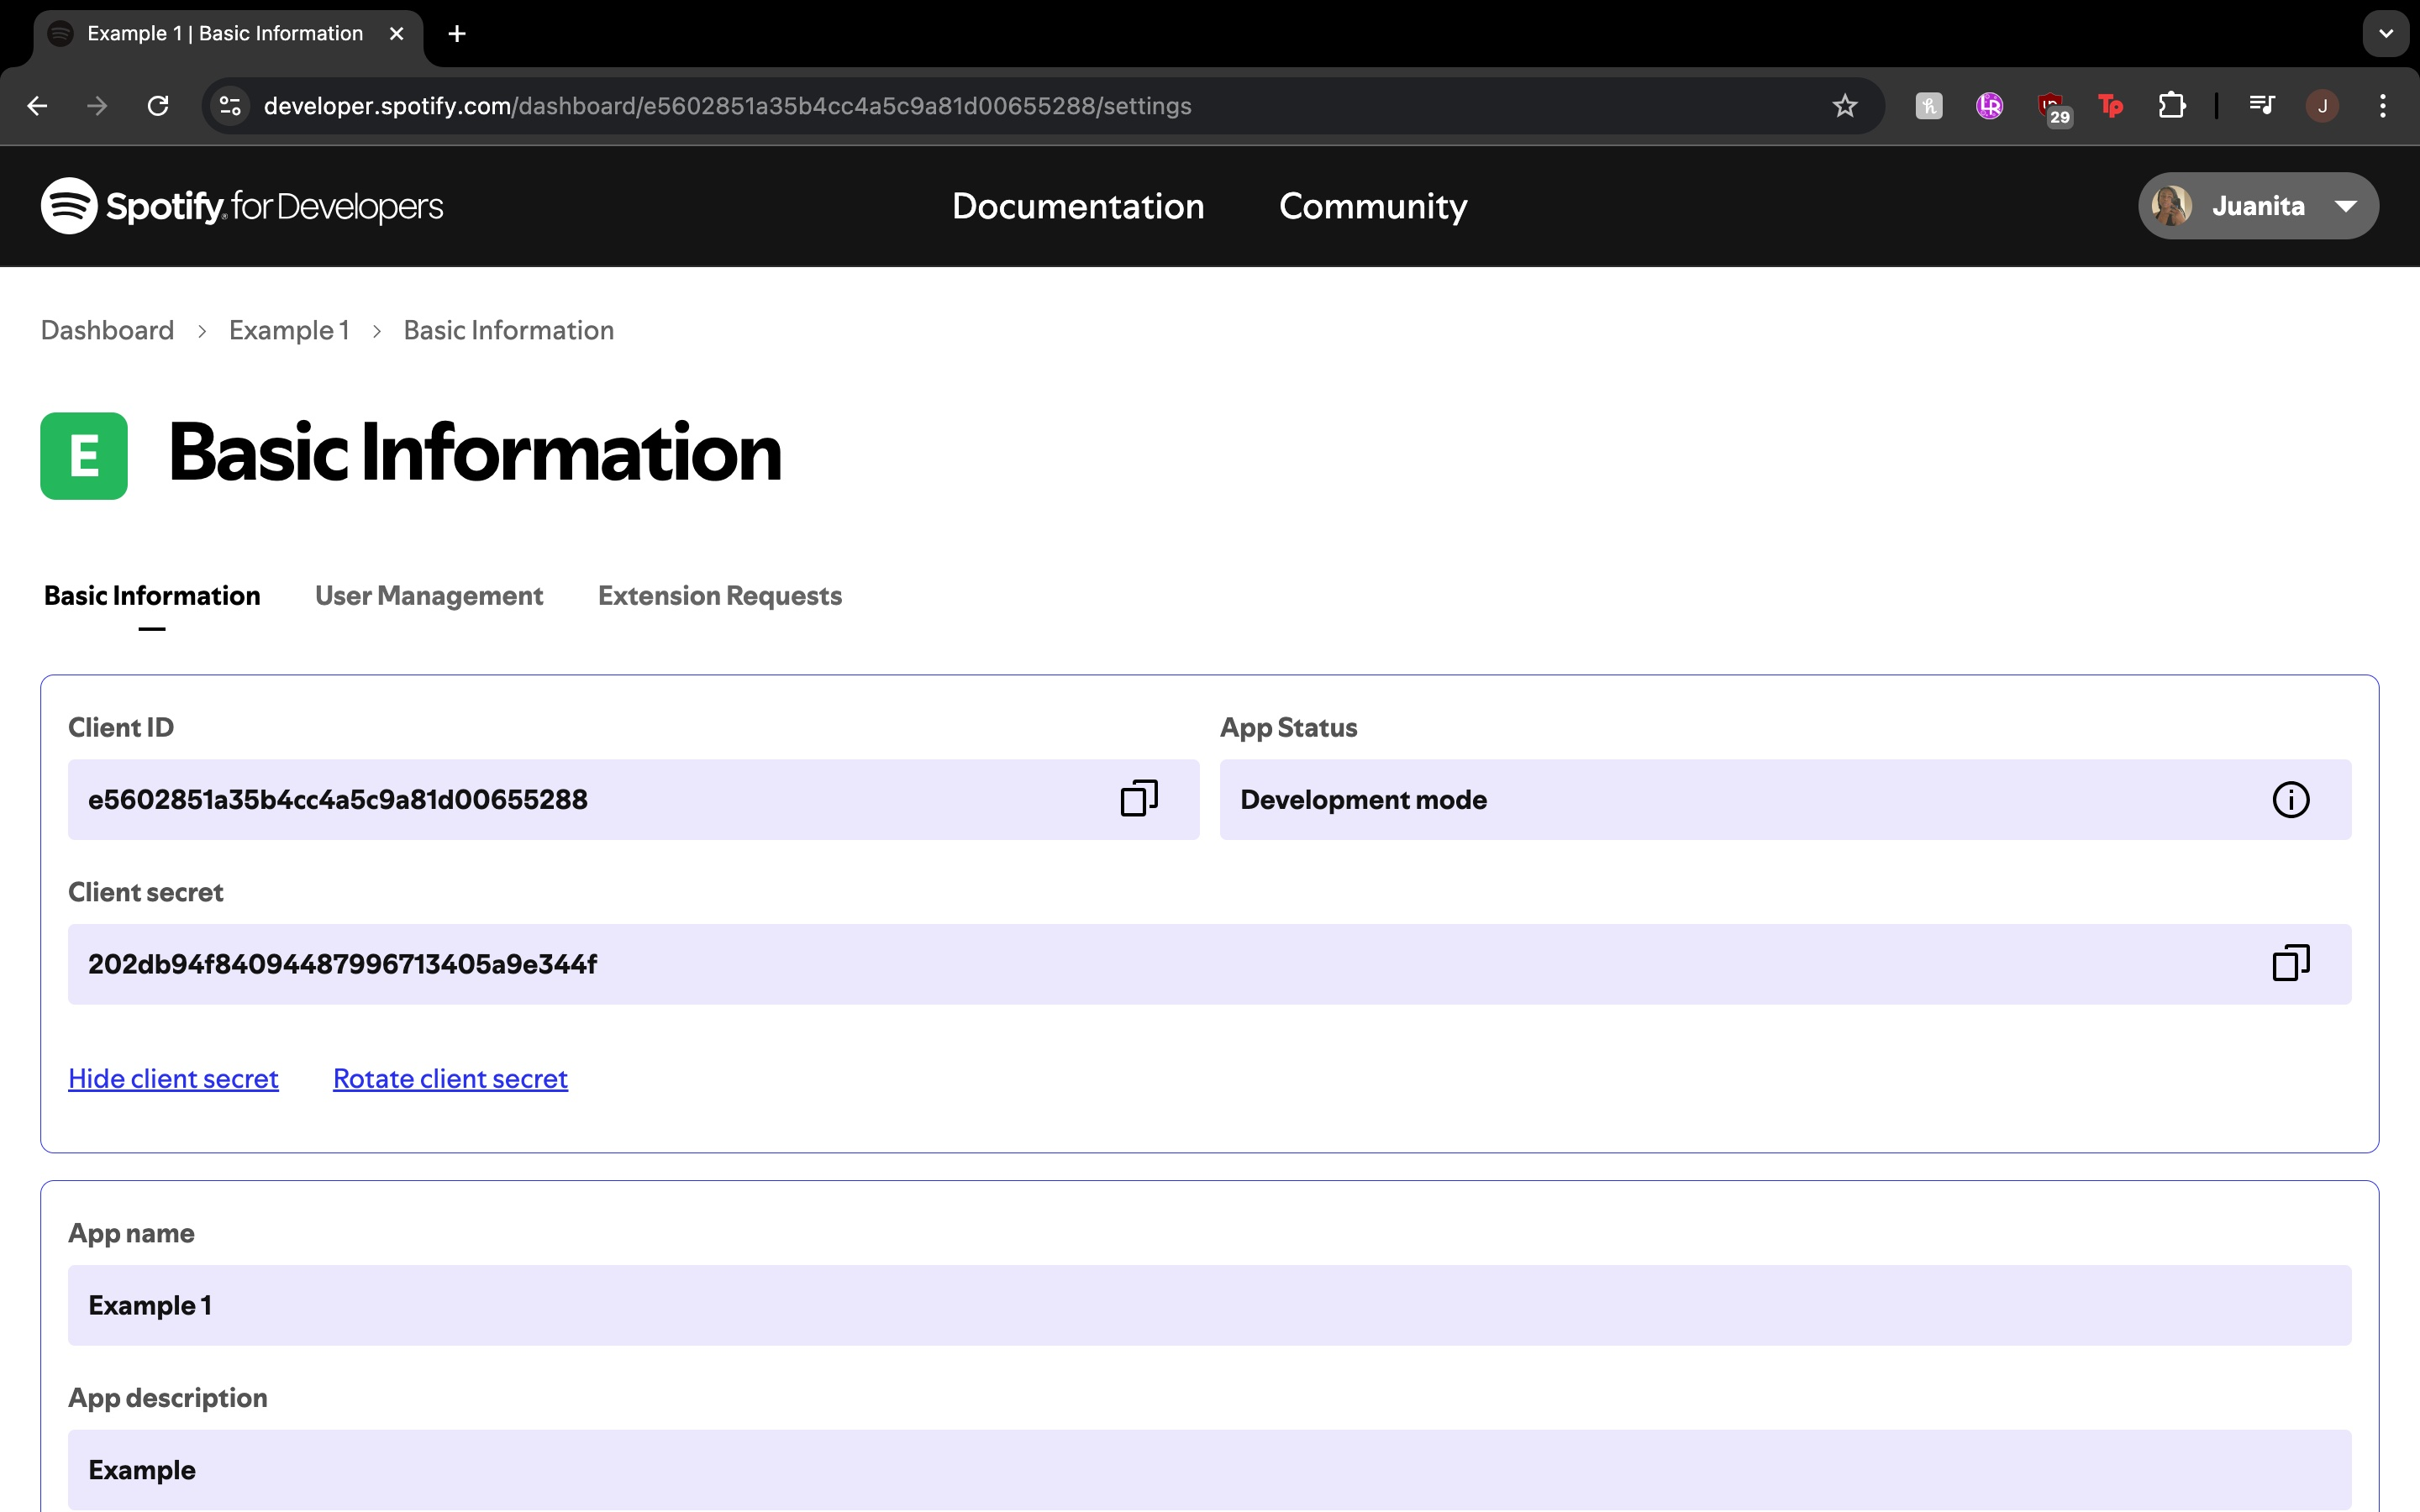

Open the `envexample.txt` file and copy and paste the credentials format.
Copy and paste your Spotify credentials into a new .env file and name it whatever you would like (e.g., `auth_keys.env`)

By storing your credentials in the .env file, your credentials remain secretive but the program can still be used by others who follow the same steps.

.env is included in the .gitignore file to ensure any sensitive information does not get pushed to the remote repo.


Go back to the `spotifyapi.py` file and replace my `env_path` variable with the directory path of the .env file you have created with your credentials. This is so your program can easily find your credentials.

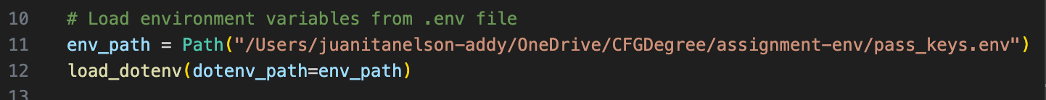

To check whether your program is able to find your credentials, you can uncomment **lines 19 and 20** in the ‘spotifyapi.py’ file and run the program. If successful, you should see your credentials printed in the terminal.

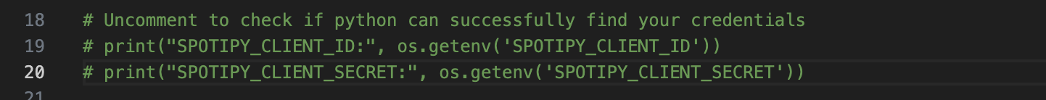

This next screenshot shows **lines 25 and 26** use the API to pull information from Spotify and return the information as json.

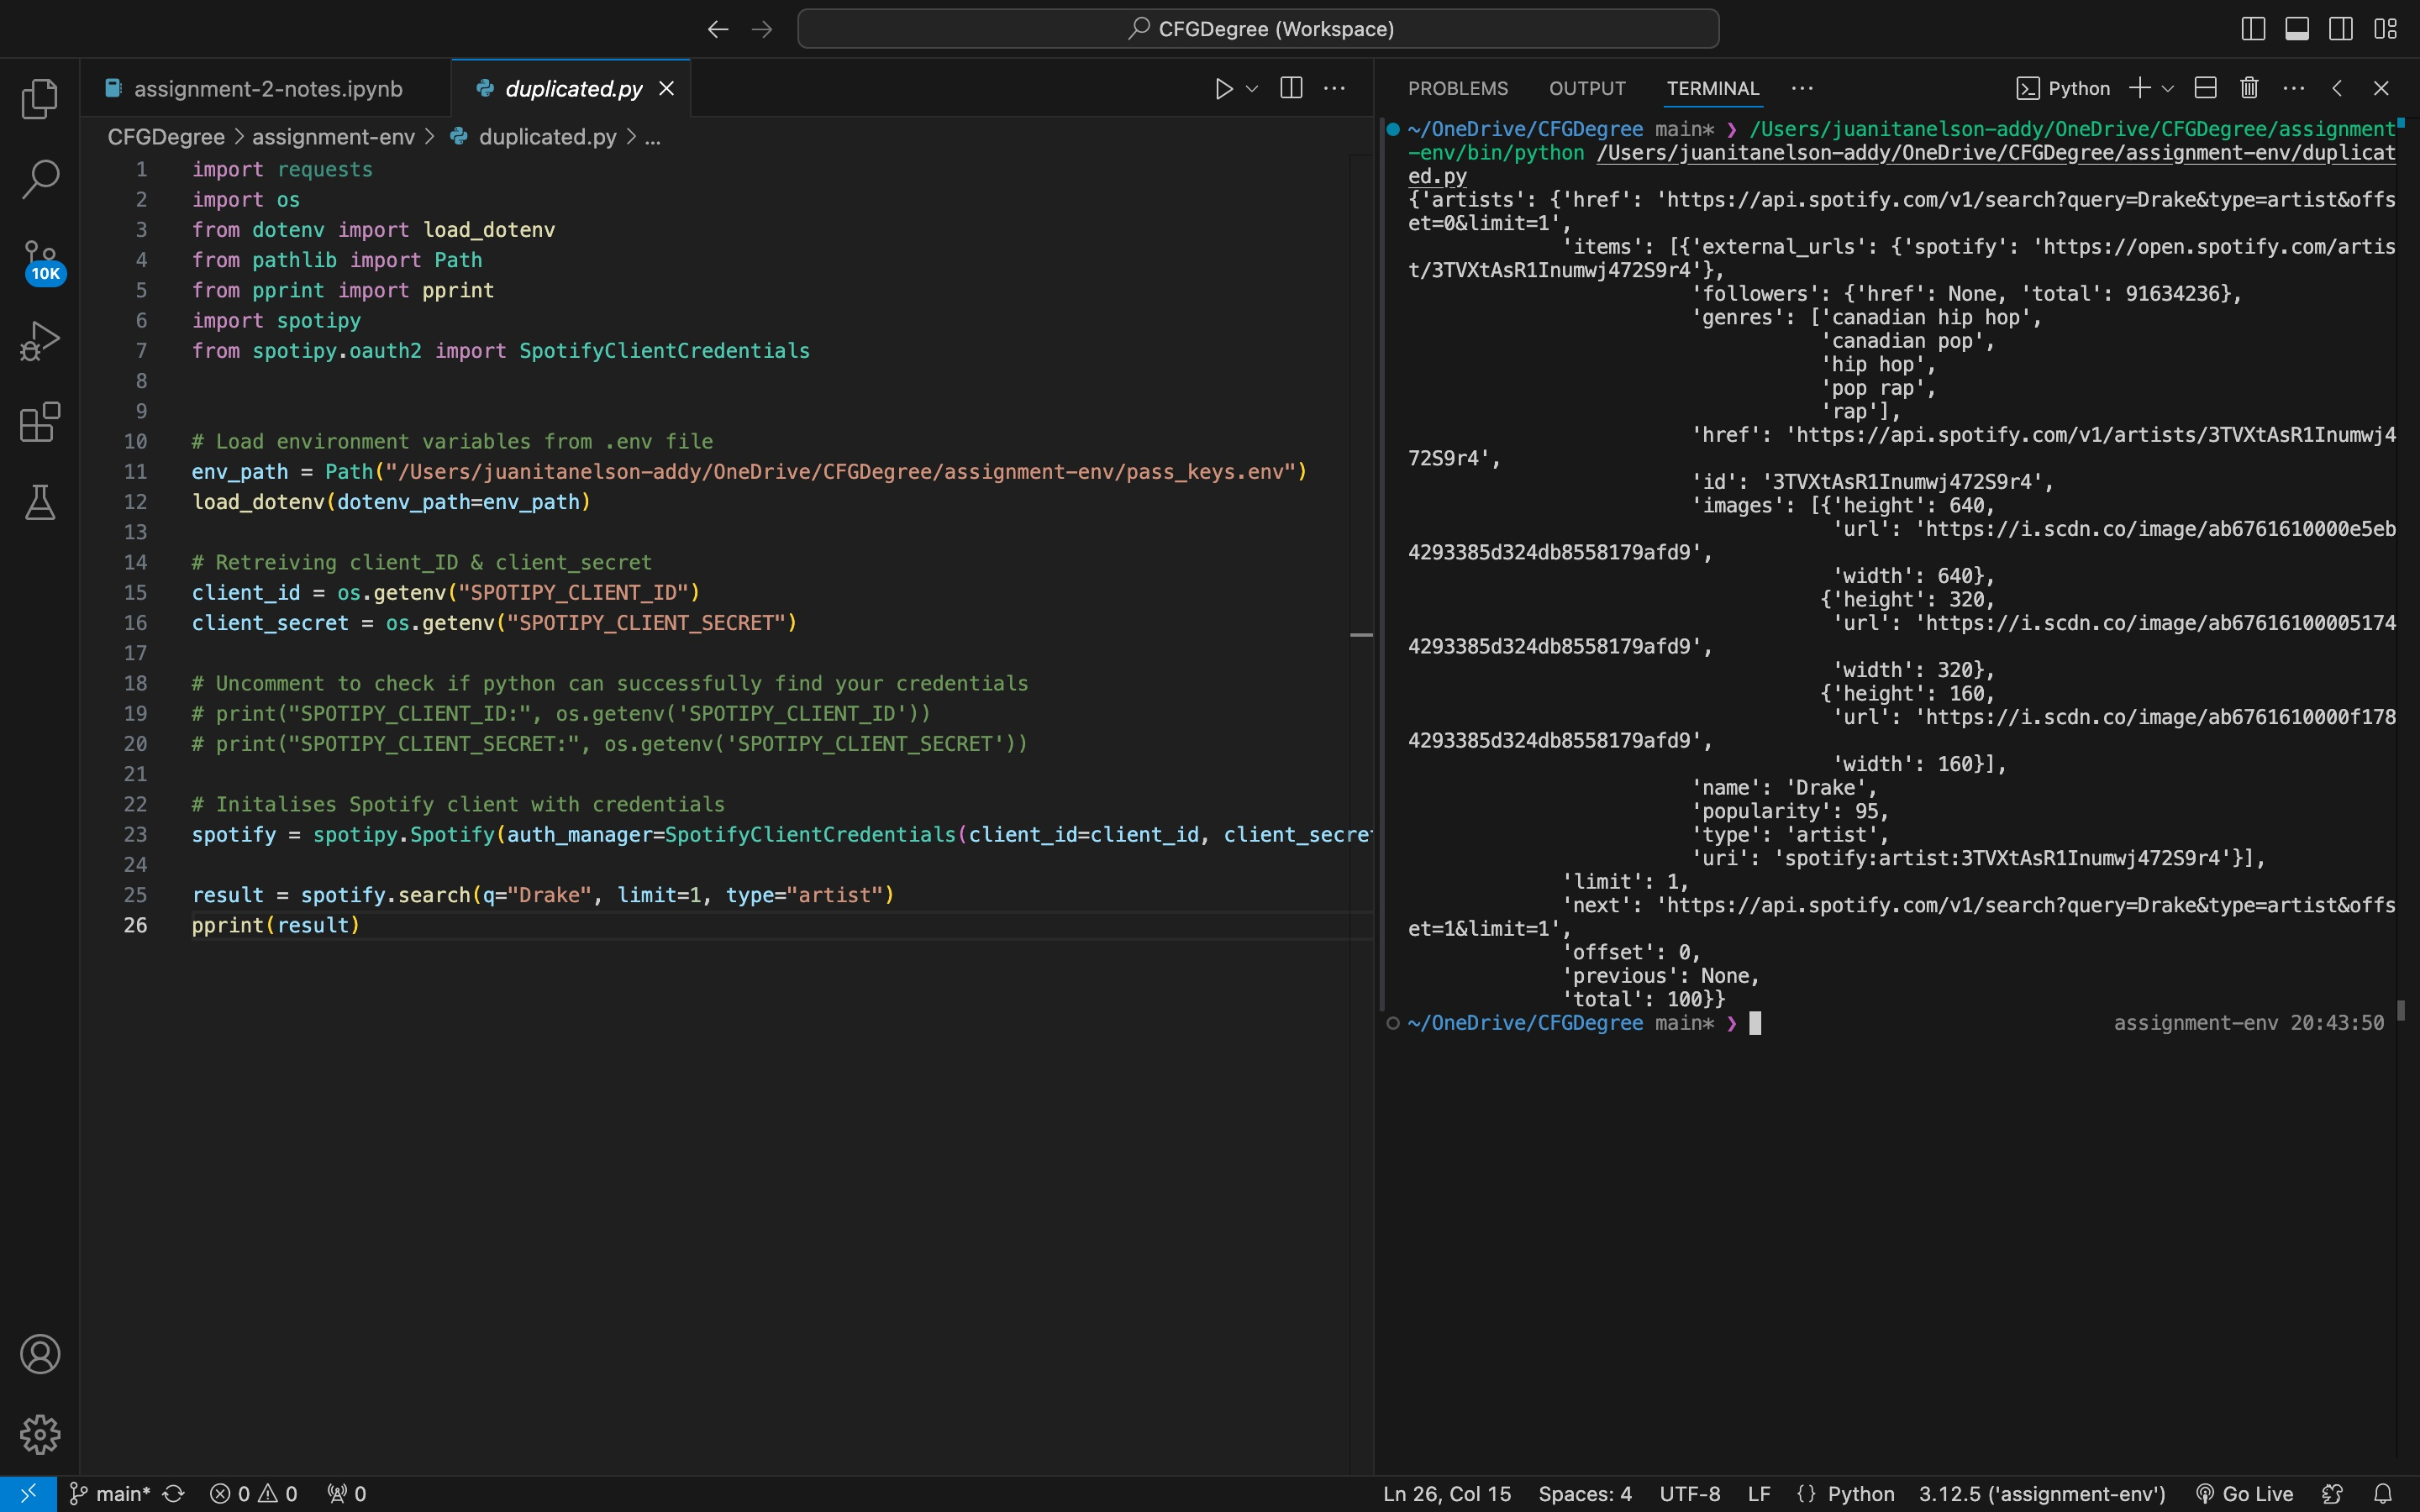

<br>

## Libraries/ Modules Installations

I used `pip freeze > requirements.txt` to create my `requirements.txt` file with the list of dependencies.

To install the packages, type the following code into your terminal:
`pip install -r requirements.txt`

<br>

**Spotipy** - This is a library designed to make working with the Spotify WebAPI easier. You are able get information without directly using the python `requests` library because Spotipy has created functions that make getting information from the various SpotifyAPI endpoints easier. It has also helped manage the Spotify authorisation.


<br>

**Pathlib** - This module allows you to handle file system paths using different classes and methods. I specifically imported the class `Path` to assign the path of my .env file to a variable. This then allowed me to use this variable with the `os` module.

<br>

**OS** - This module allows you to interact with your operating system. This allows the code to work across different operating systems like Windows, MacOS and Linux. I used this in my program for the path to my .env file to access and retrieve my environment variables.

<br>

**Python dot-env** - This library allows you to manage Python environment variables from a .env file. In this case, I have utilised the `load_dotenv()` function to access the Spotify credentials that were stored in the .env files.

<br>

**Pprint** - This module allows us to print Python data in a more human-readable format. In this case, the pprint allowed us to retrieve the detailed JSON information from the API and present it more clearly to be able to distinguish the nested dictionaries and lists.

<br>

## Demonstrating Spotify Client

The following screenshots show the running of my console app.


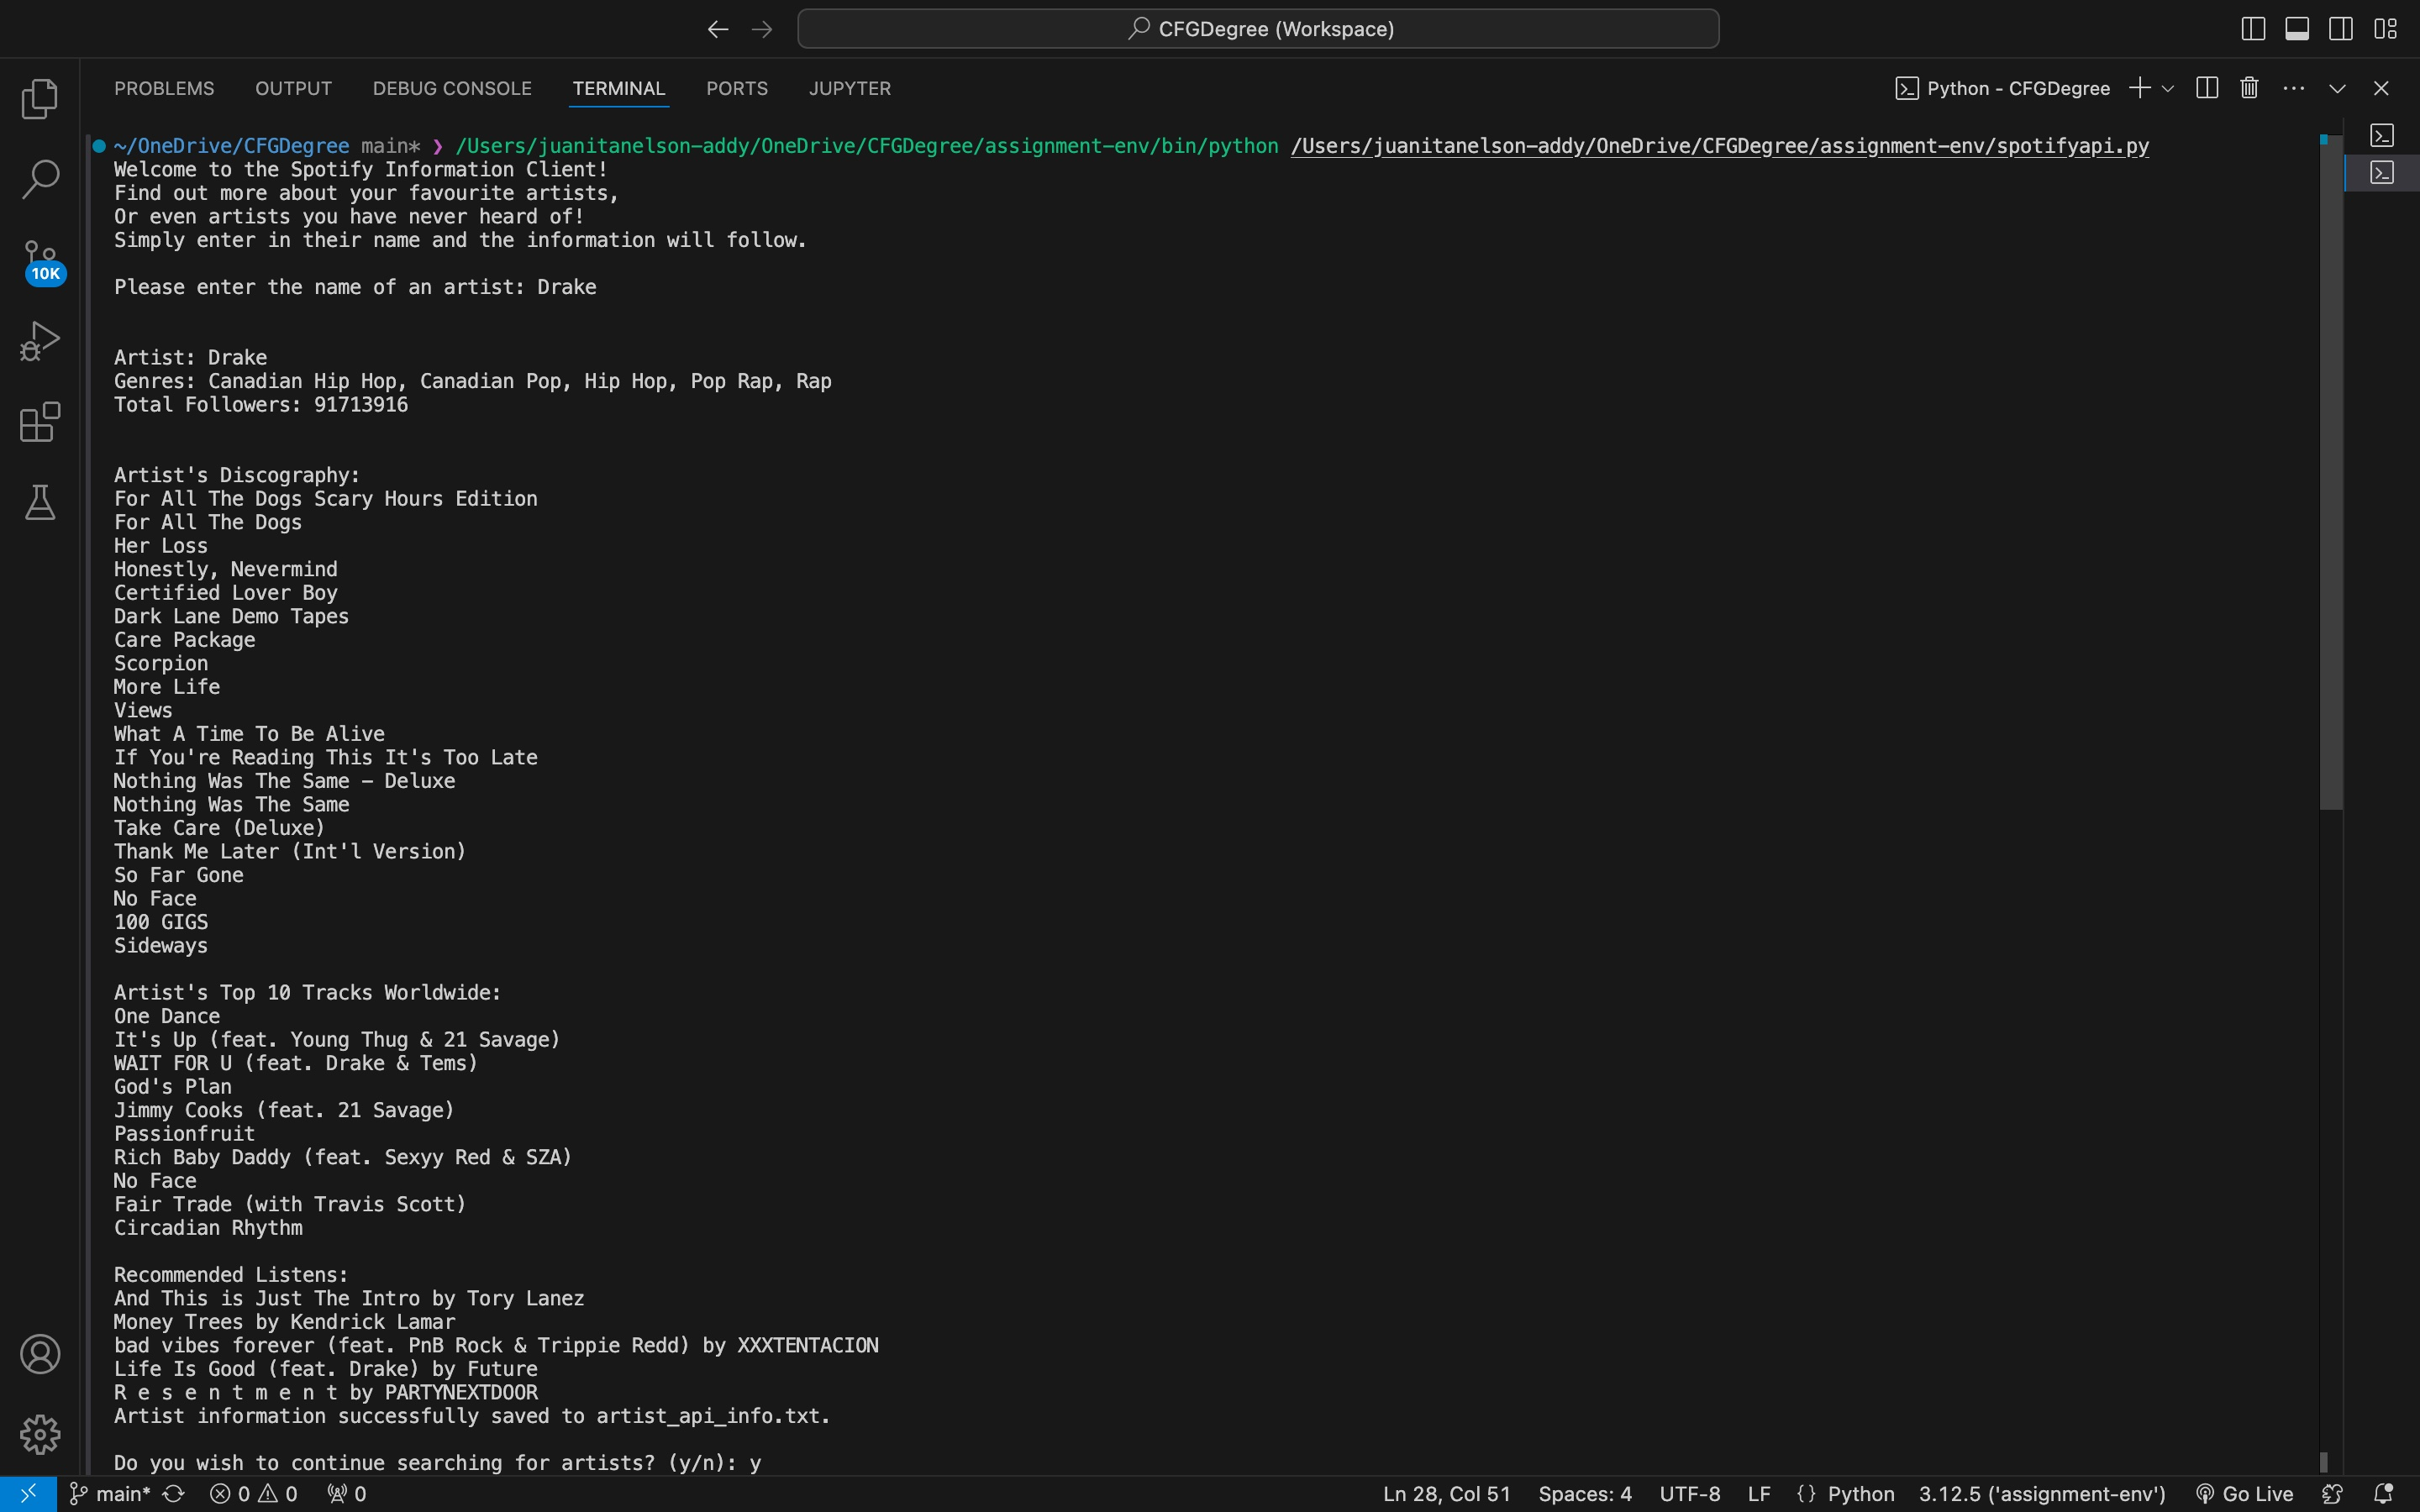

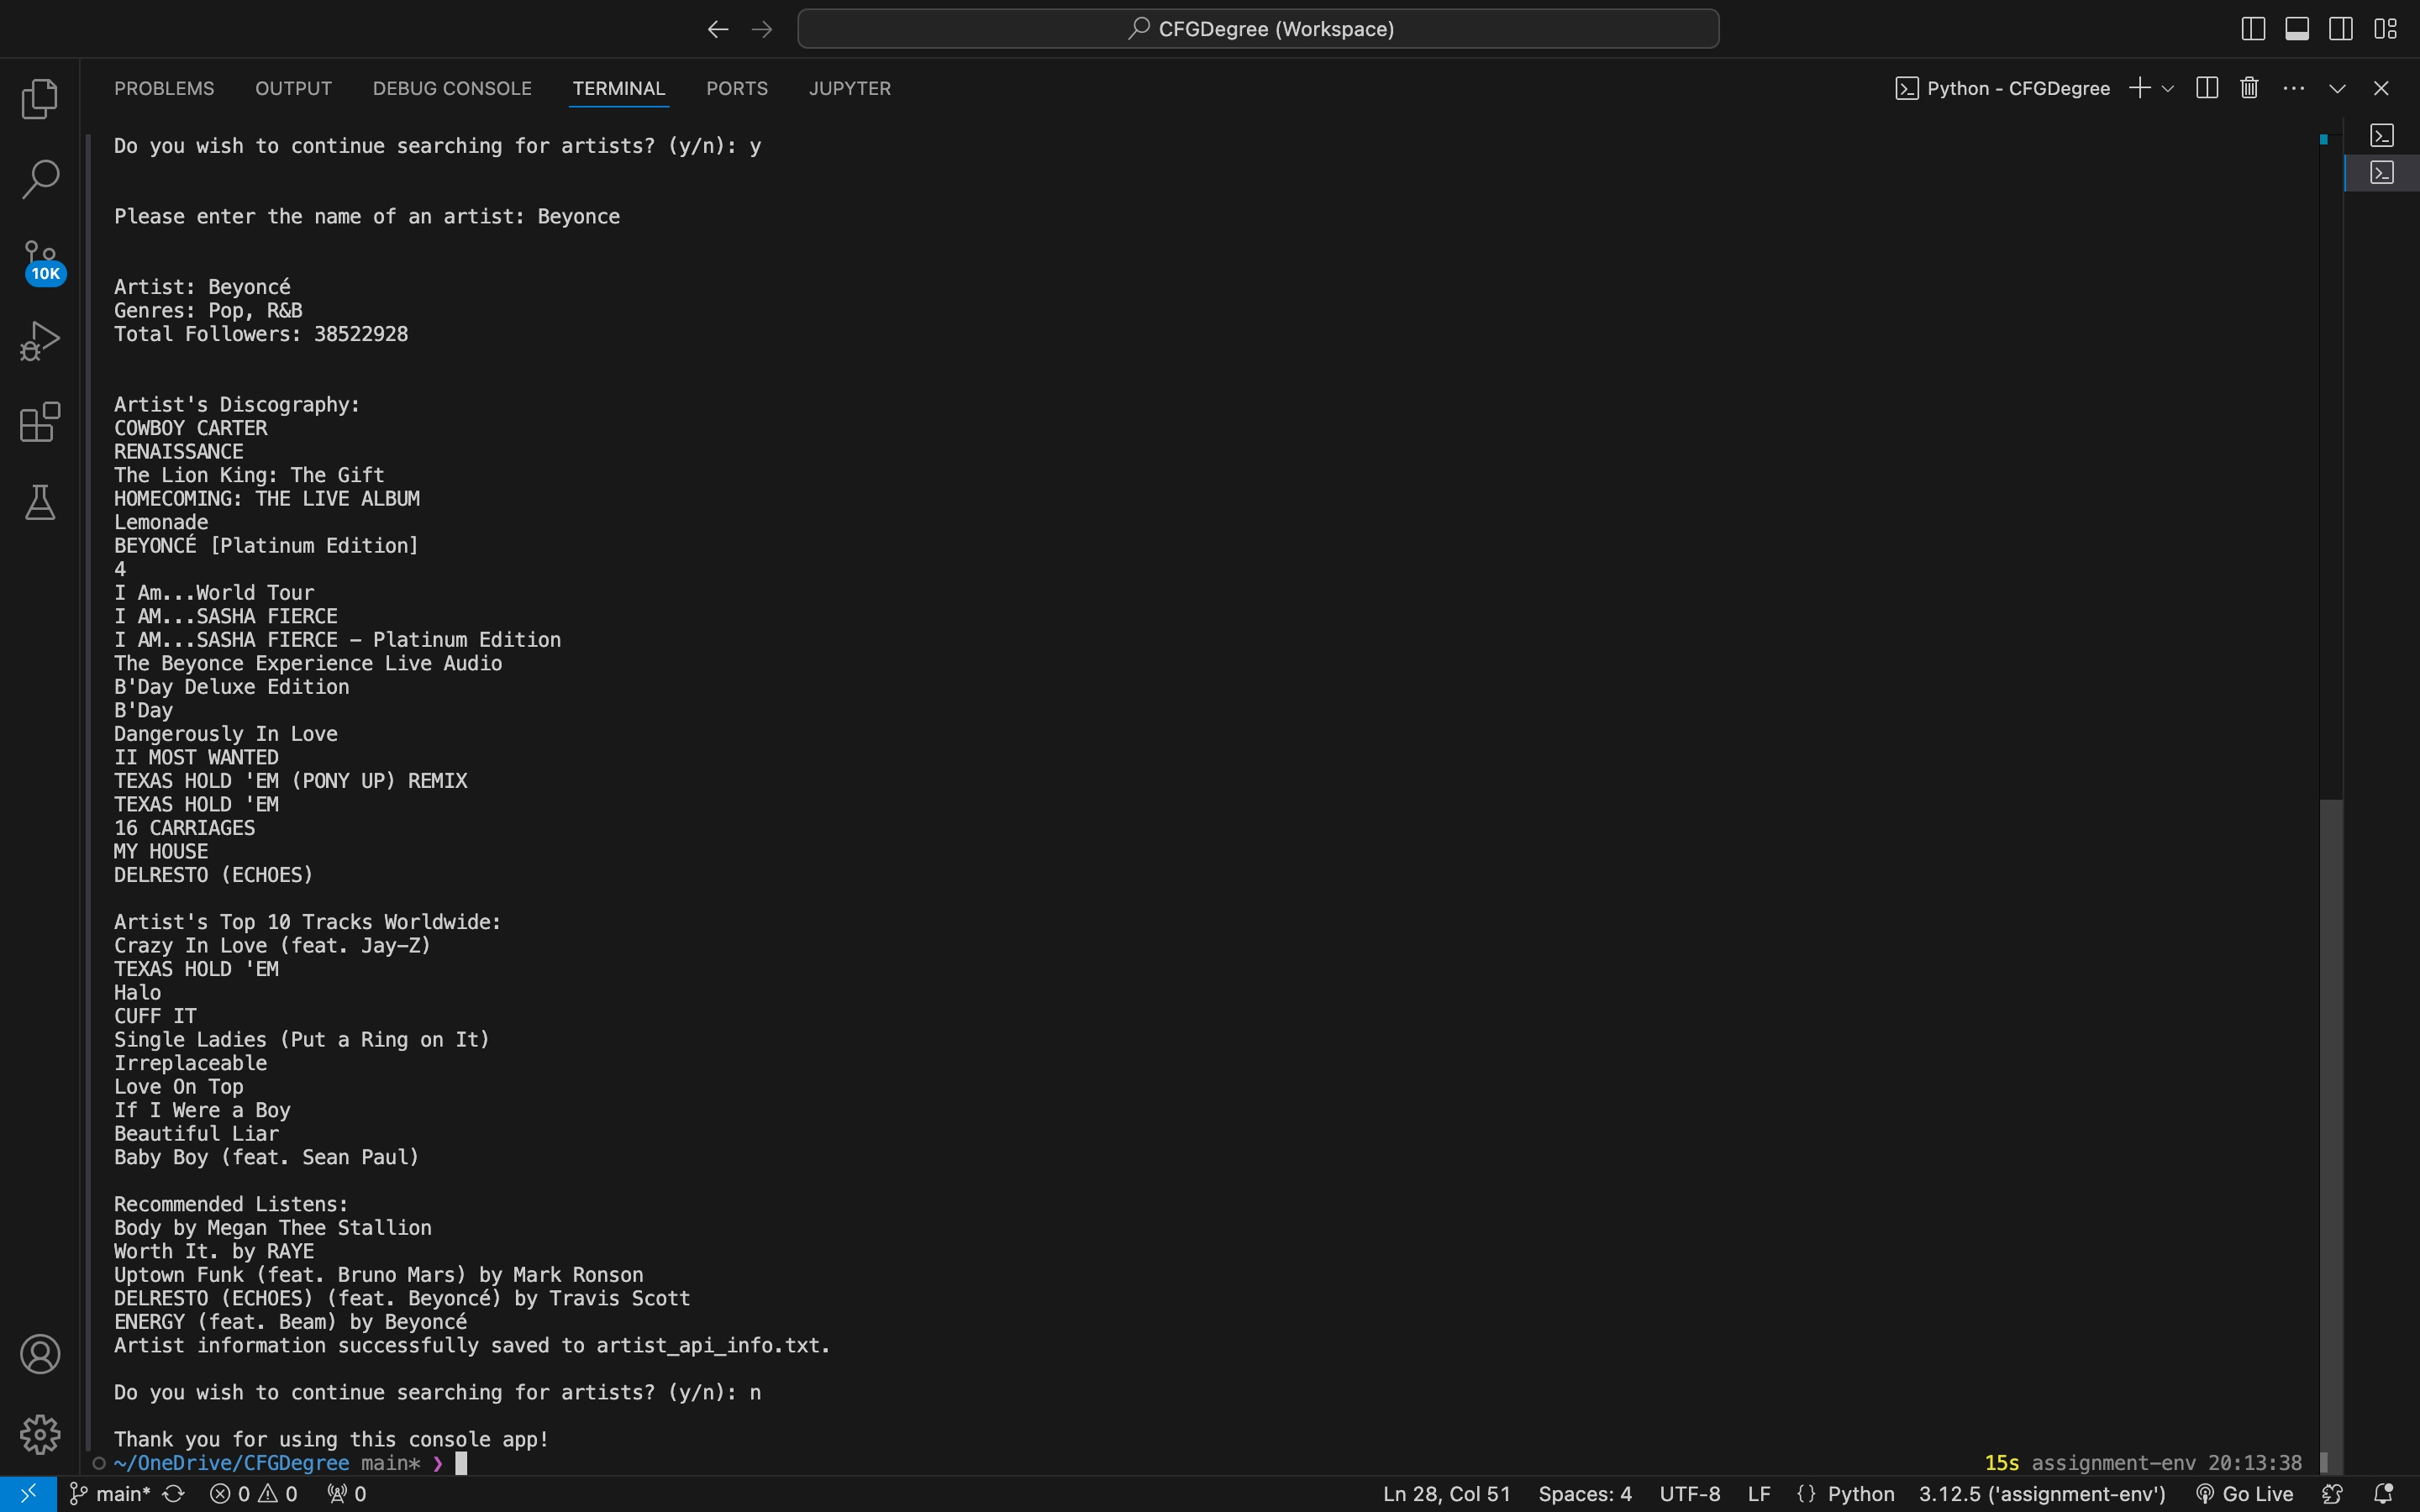

#### Console Output Brief Explanation

There is an introductory message informing what is required of the user. Then the prompt is shown where the user inputs an artist name. The code then returns the artist name, genres, follower count, their entire discography, top 10 tracks worldwide and 5 recommended songs based on the given artist.

After this has run, the user is asked whether they would like to continue searching. If the user answer 'y', then program will run again. If 'n' the code will end the loop and display the final message.

## Code Breakdown

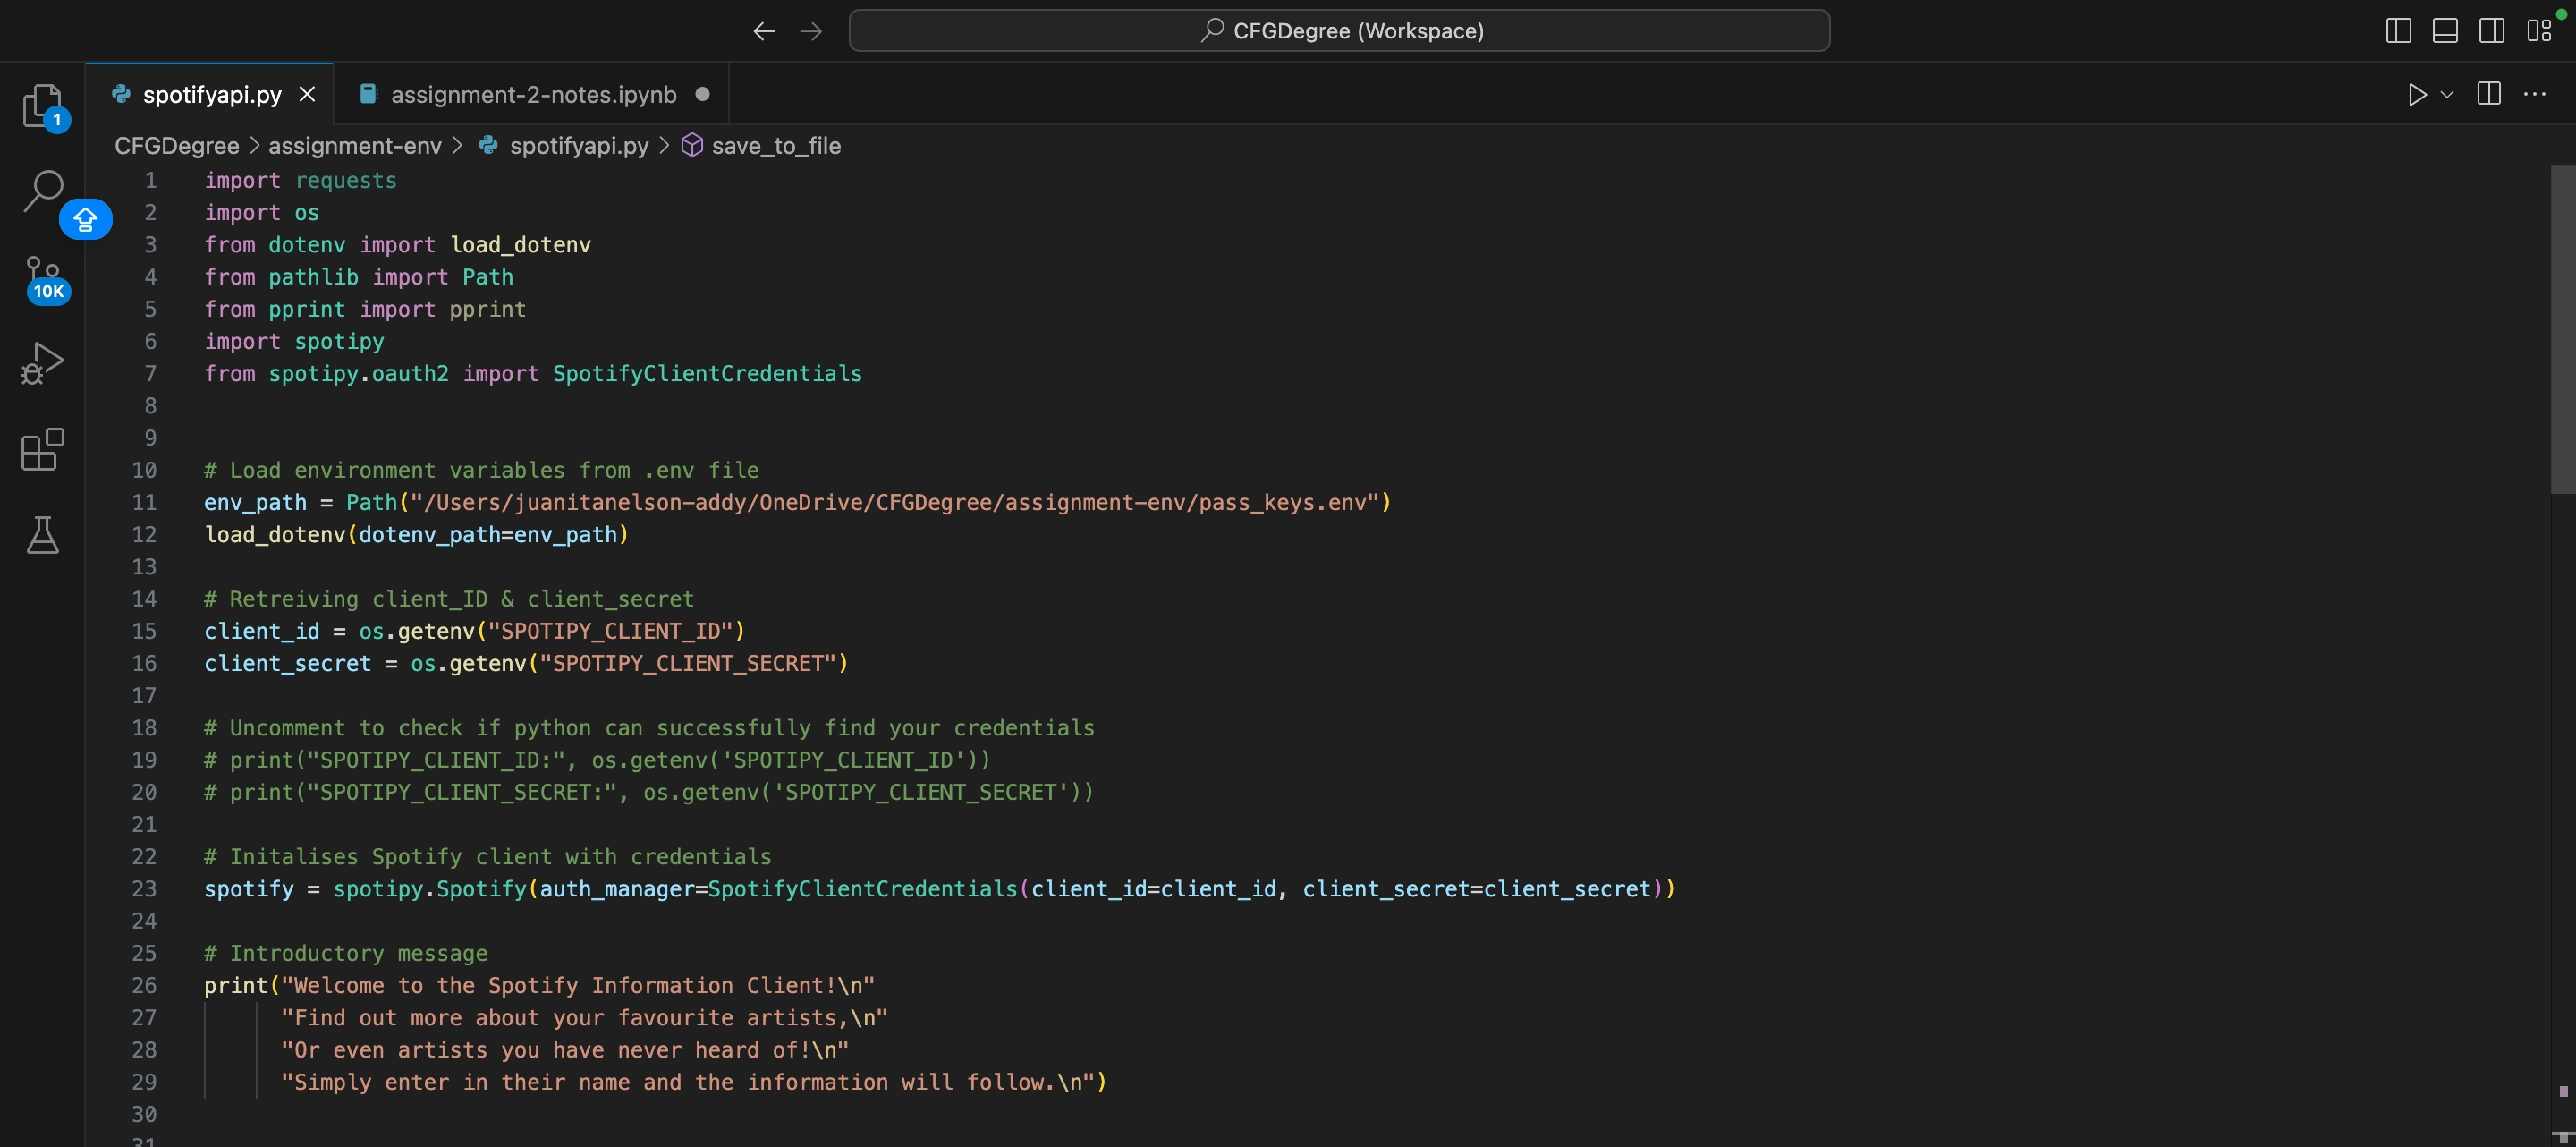


This screenshot shows the Spotify authorisation and the introductory message that the user sees.

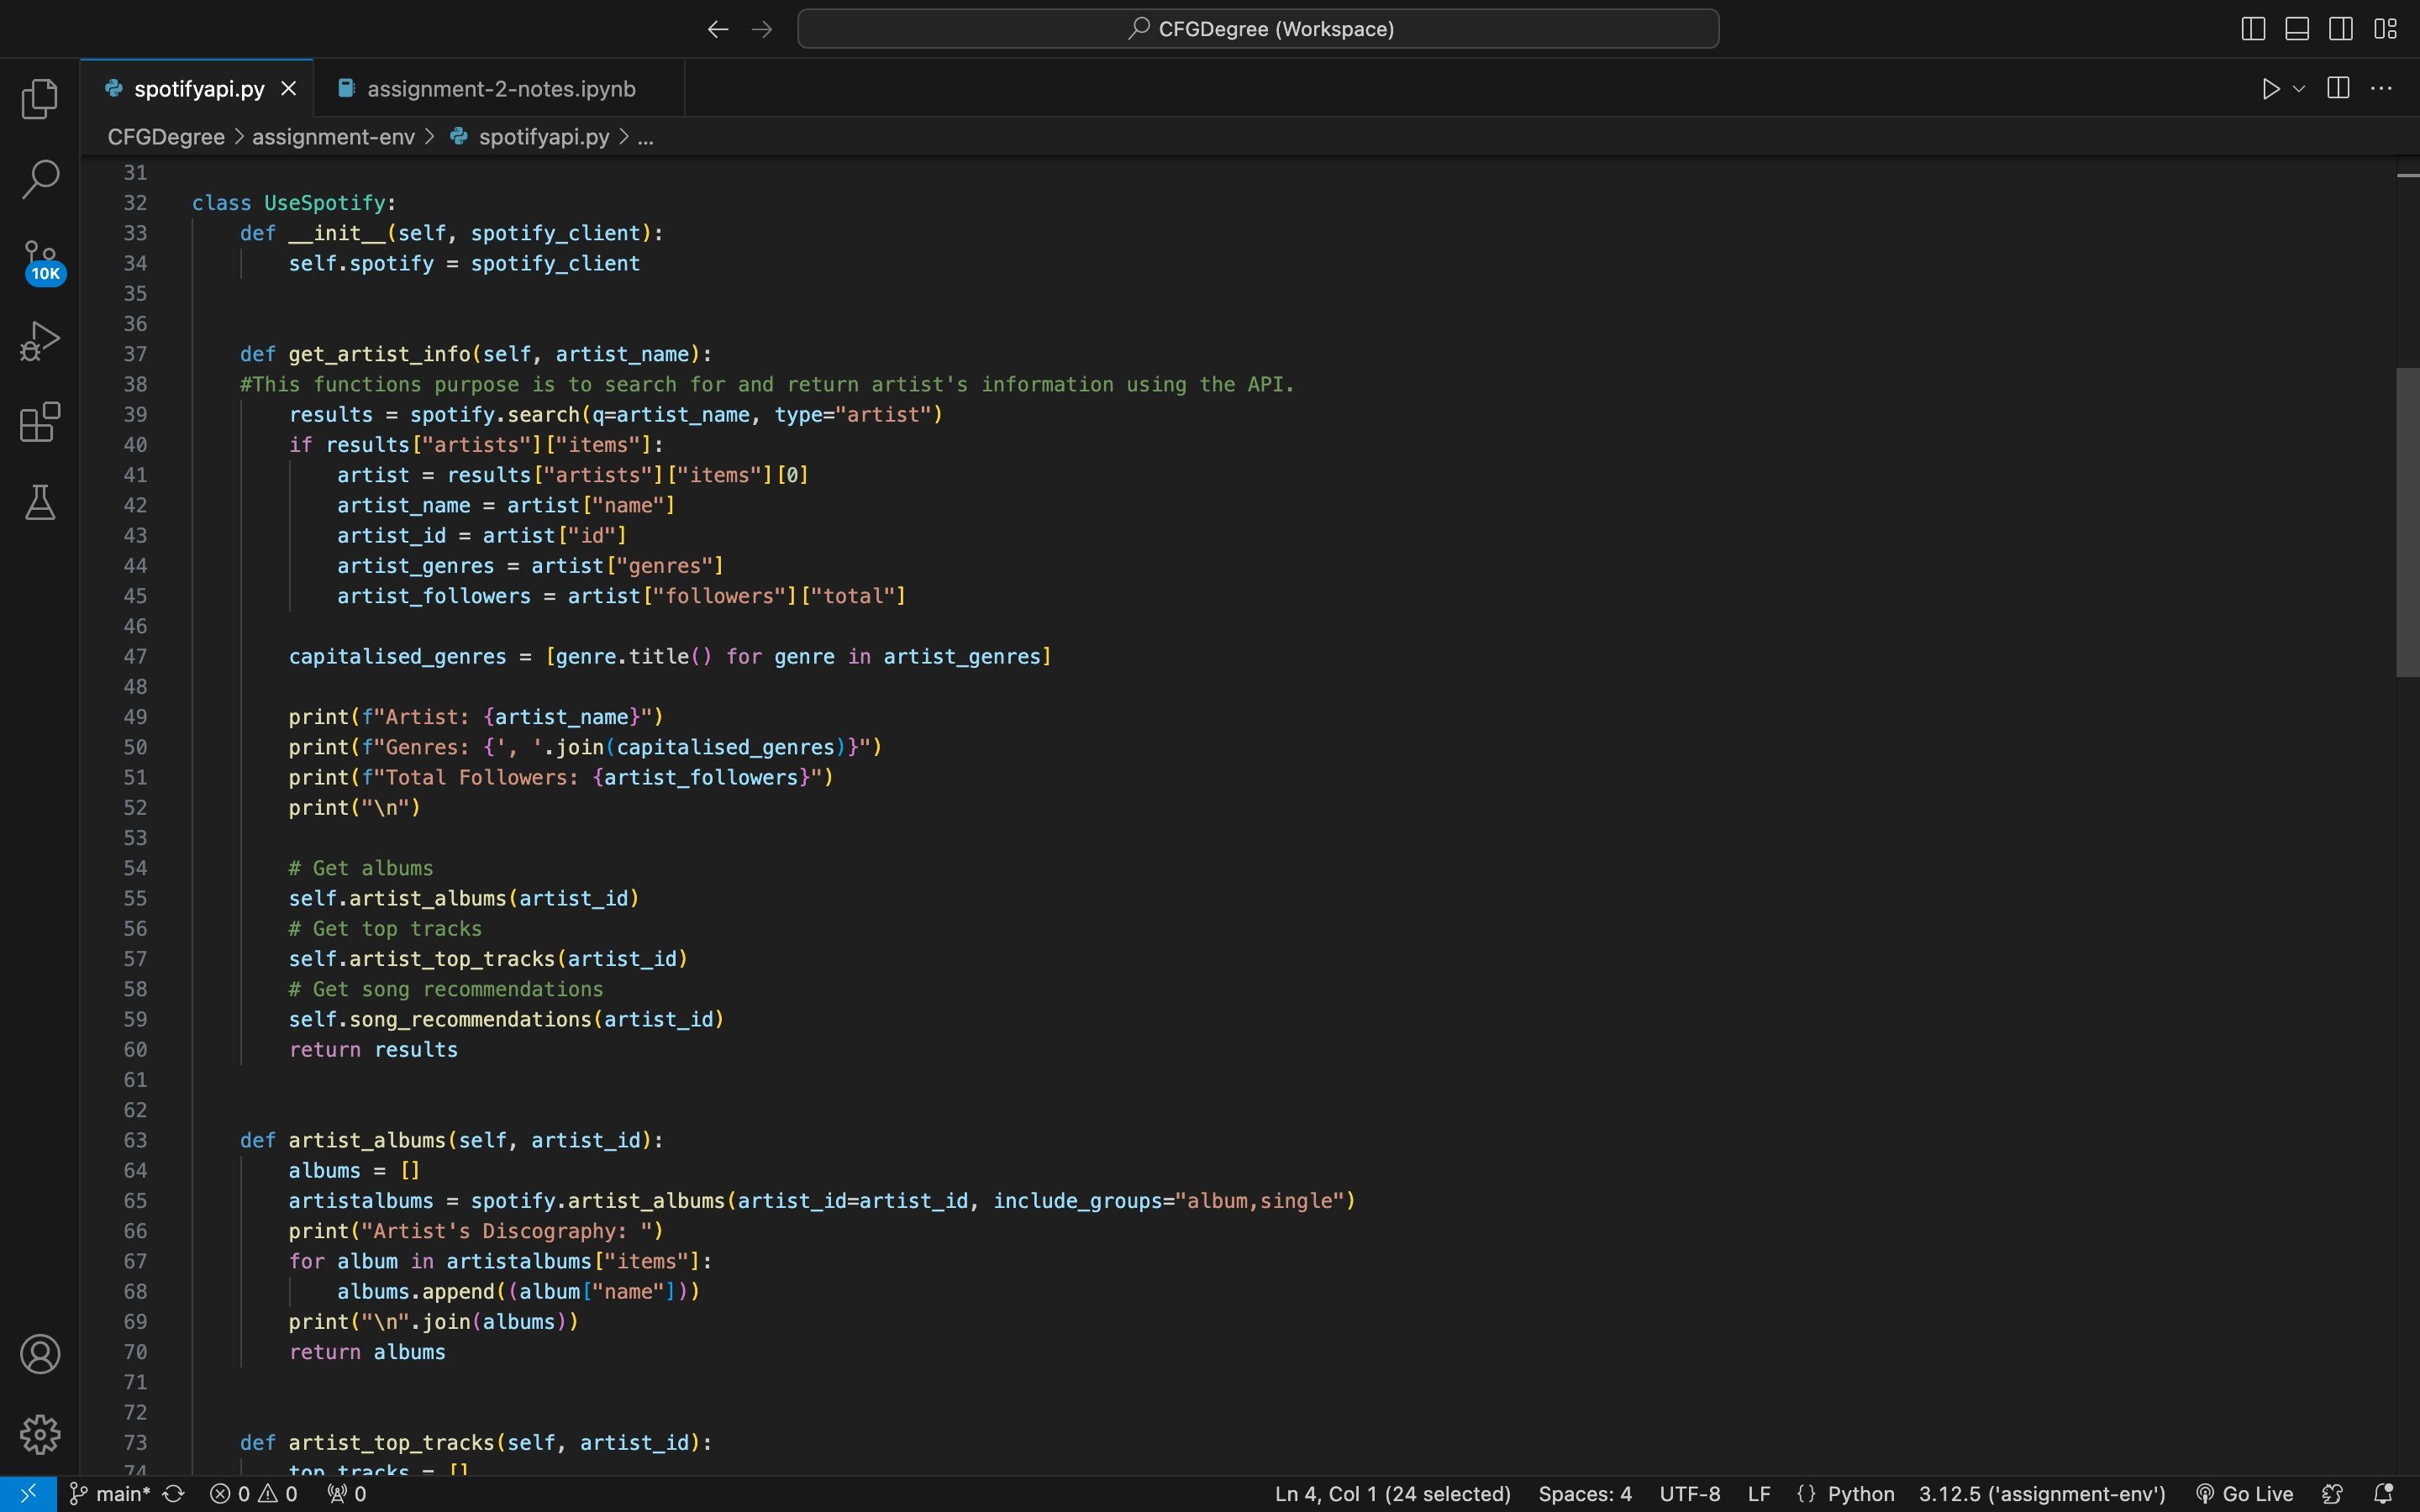

Since I was creating functions for the API retrieval, I decided to create the functions within the class `UseSpotify`. This would allow for easier reusability later down the line if I were to develop this code. It also helps keep the code structured and cleaner, especially when other functions and variables could make the readibility more difficult. All the functions are accessing the same Spotify client so it makes more sense to create them within a class.

`get_artist_info()` is the primary function that handles the user's input and returns the information back to the user.

<br>

From [Spotipy's documentation website -](https://spotipy.readthedocs.io/en/latest/#api-reference)
Spotipy supports a number of different ID types:

Spotify URI - The resource identifier that you can enter, for example, in the Spotify Desktop client’s search box to locate an artist, album, or track. Example: `spotify:track:6rqhFgbbKwnb9MLmUQDhG6`

Spotify URL - An HTML link that opens a track, album, app, playlist or other Spotify resource in a Spotify client. Example: `http://open.spotify.com/track/6rqhFgbbKwnb9MLmUQDhG6`

Spotify ID - A base-62 number that you can find at the end of the Spotify URI (see above) for an artist, track, album, etc. Example: `6rqhFgbbKwnb9MLmUQDhG6`

<br>

So my client is using the Spotify ID which is the `artist_id` to identify the artist and pull that information. In the API, the genres return in a lower case format so I created a variable to capitalise the genres for neater presentation in the output.

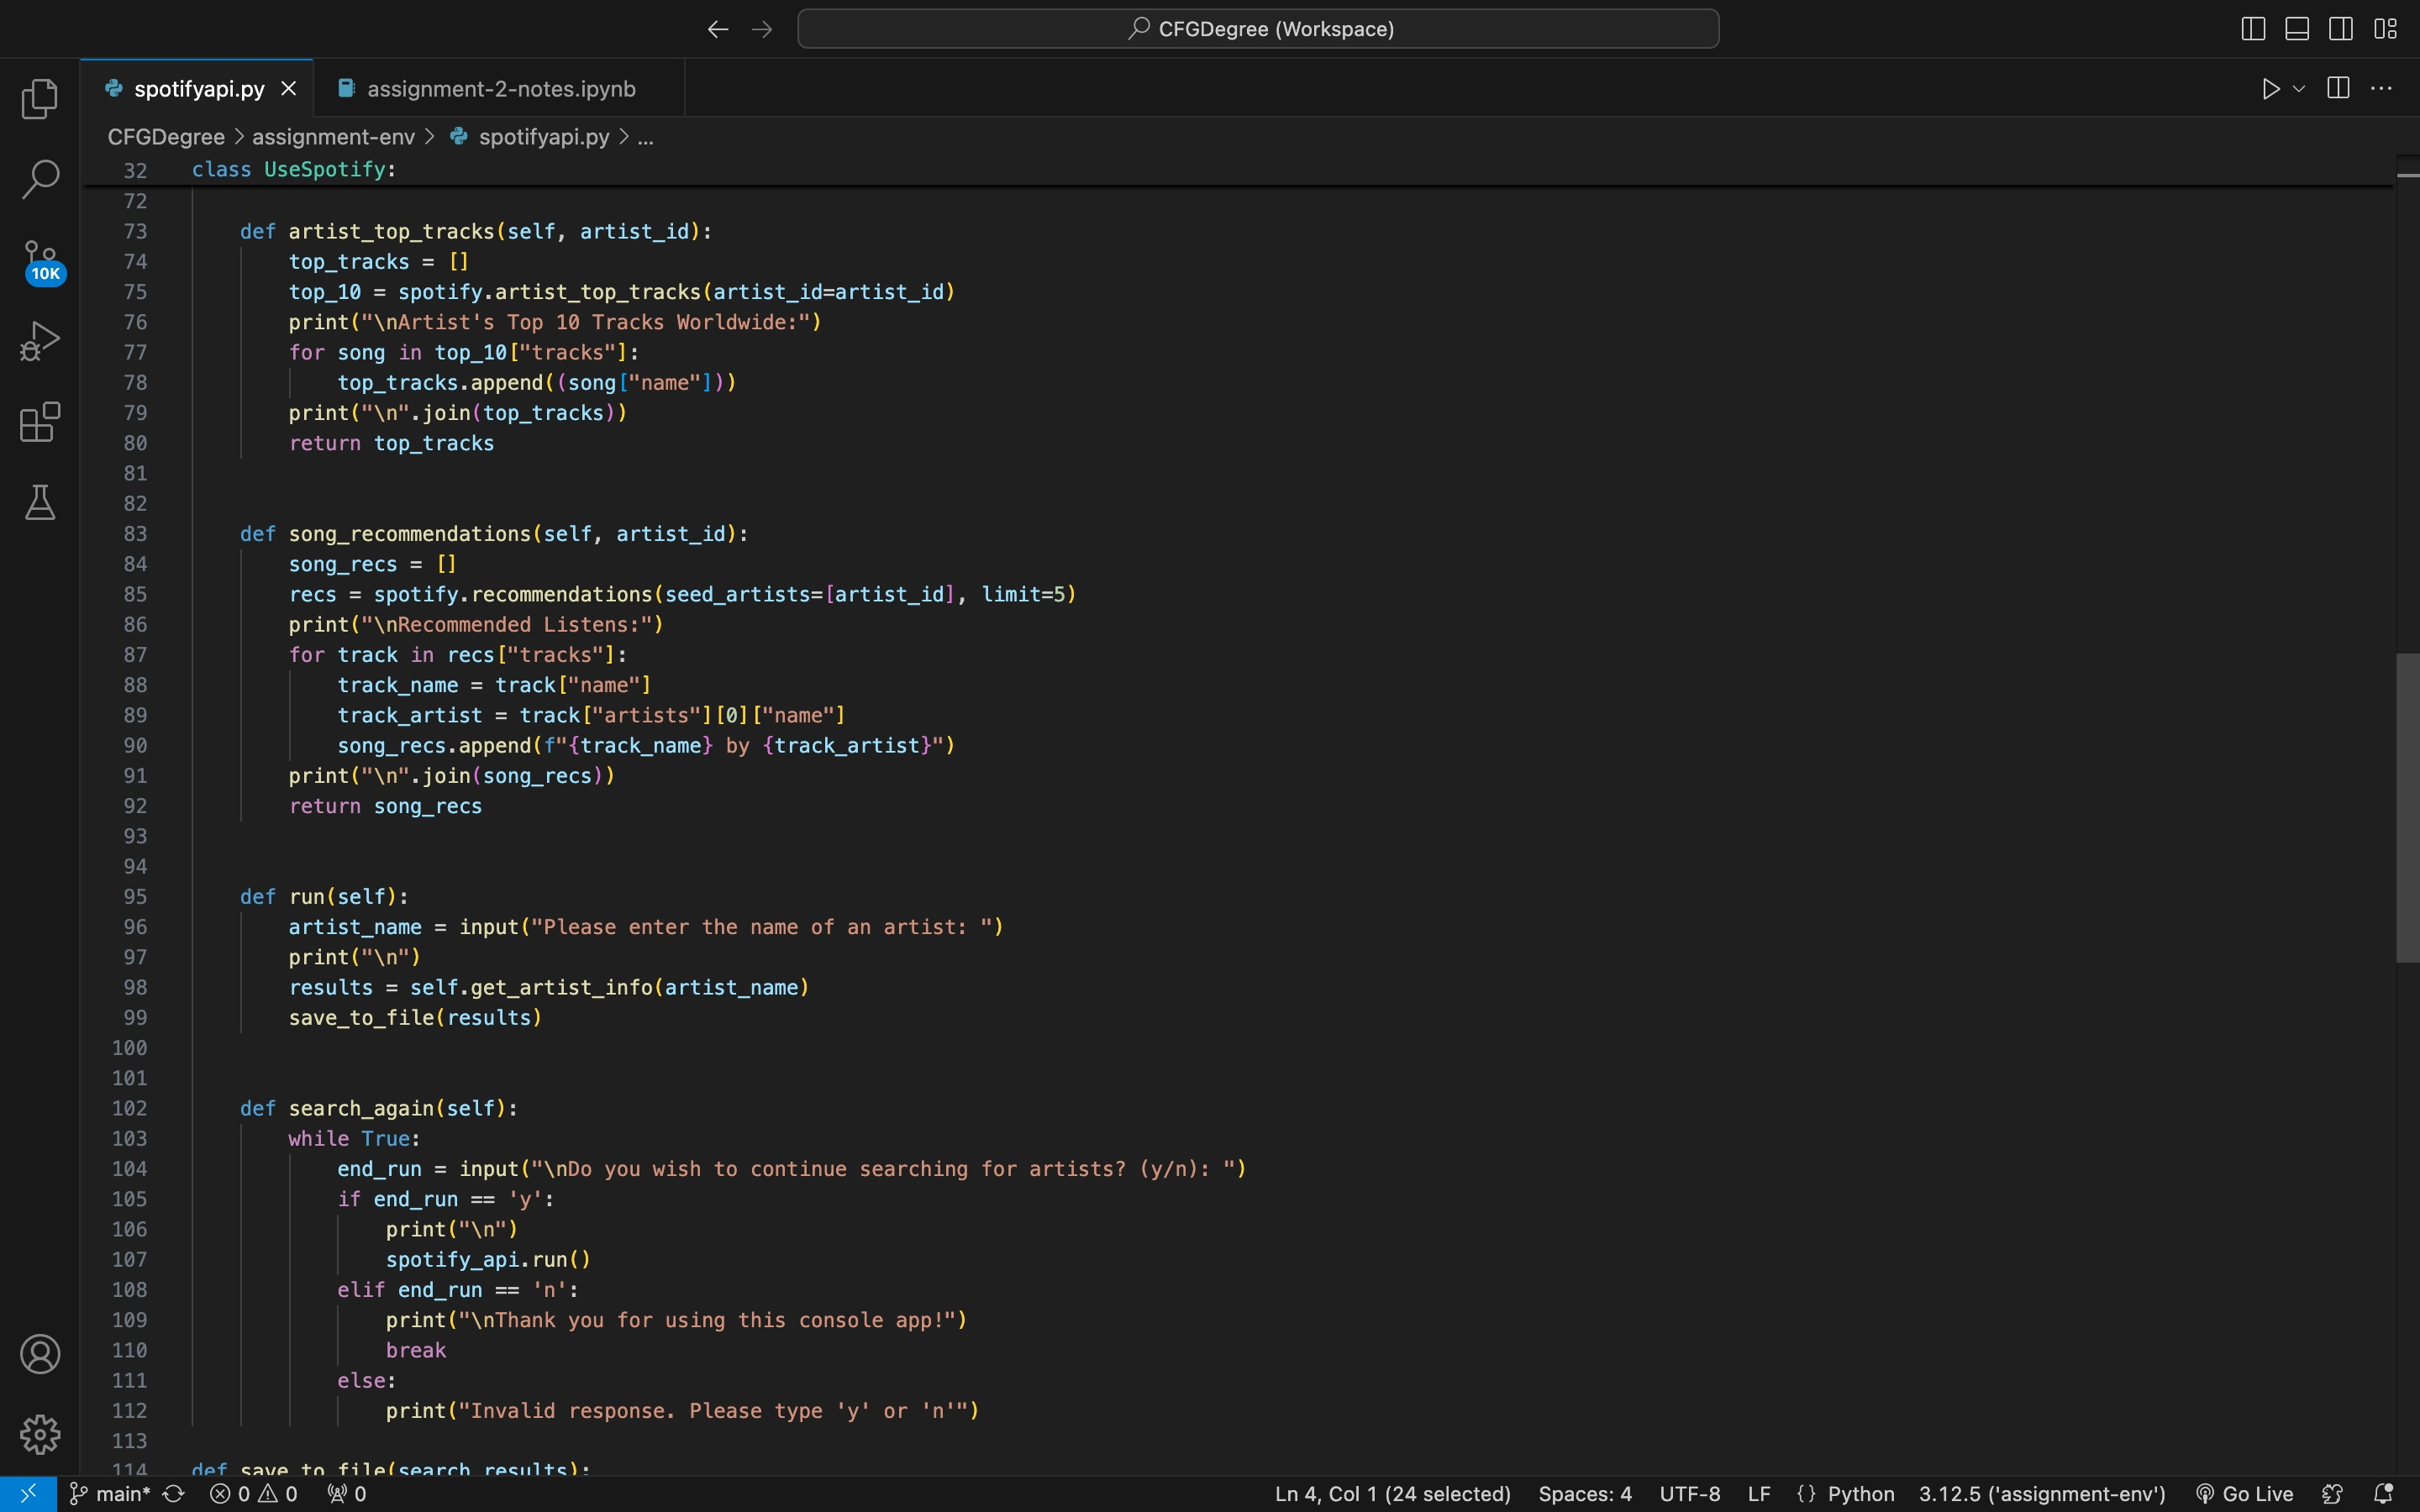

The `artist_albums()`, `artist_top_tracks()` and `song_recommendations()` functions all use list comprehension to compile the results from the dictionary into a list and return them. I had to call those functions within the `get_artist_info()` function so that they would interact with the spotify client and get the information from the API.

`run()` is what codes in the user input and includes `save_to_file()` to ensure it is completed whilst the program is running.

`search_again()` is what allows the user to continue searching for artists until they want to stop. The if/elif/else loop that is nested within a while loop asks for the users input then uses booleans to dictate what action follows.

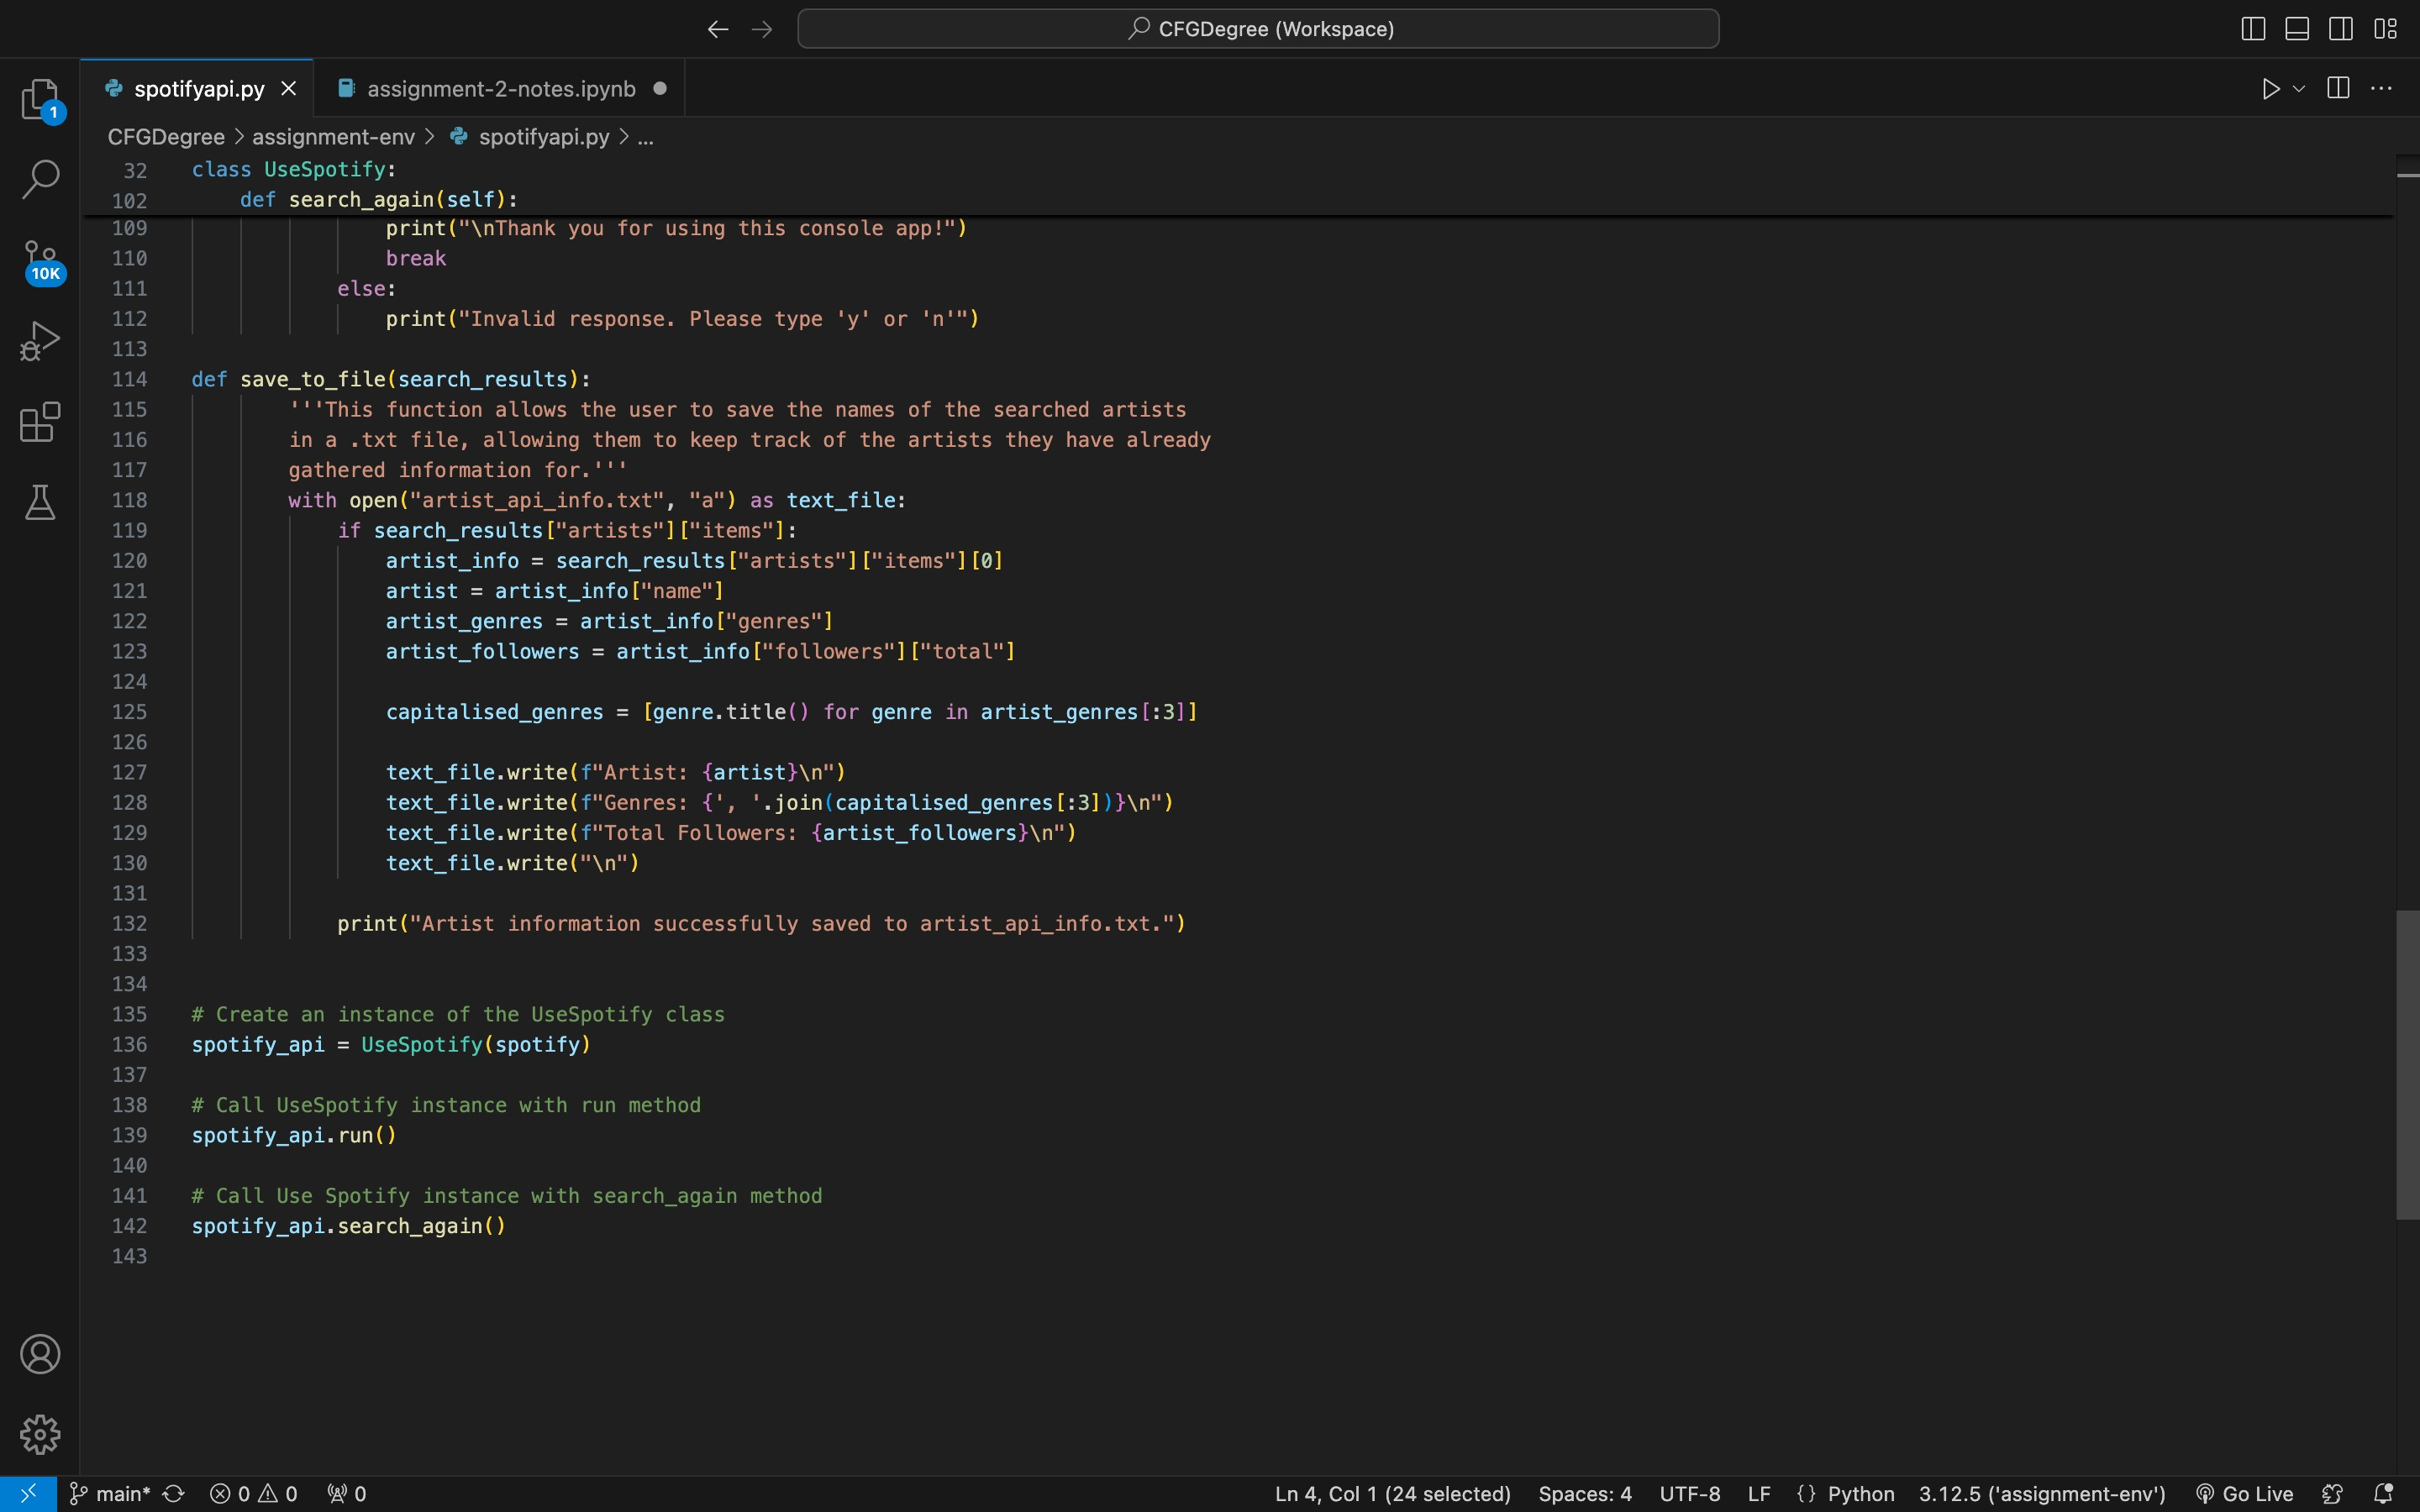

The `save_to_file()` function accesses the API in a similar way that the `get_artist_info()` does, but includes string slicing for the genres to only print the first 3 for the sake of keeping the contents in the file short and sweet. There is a final print statement to inform the user that the artist they searched for has been saved into the file.

Finally, **lines 135 to 142** create the instance of the `UseSpotify` class, use the `run()` method to newly assigned variable `spotify_api` to run the program and uses the `search_again()` function as a method to prompt the user if they wish to run the program again.

This screenshot shows the expected output of the `artist_api_info.txt` file that is created.

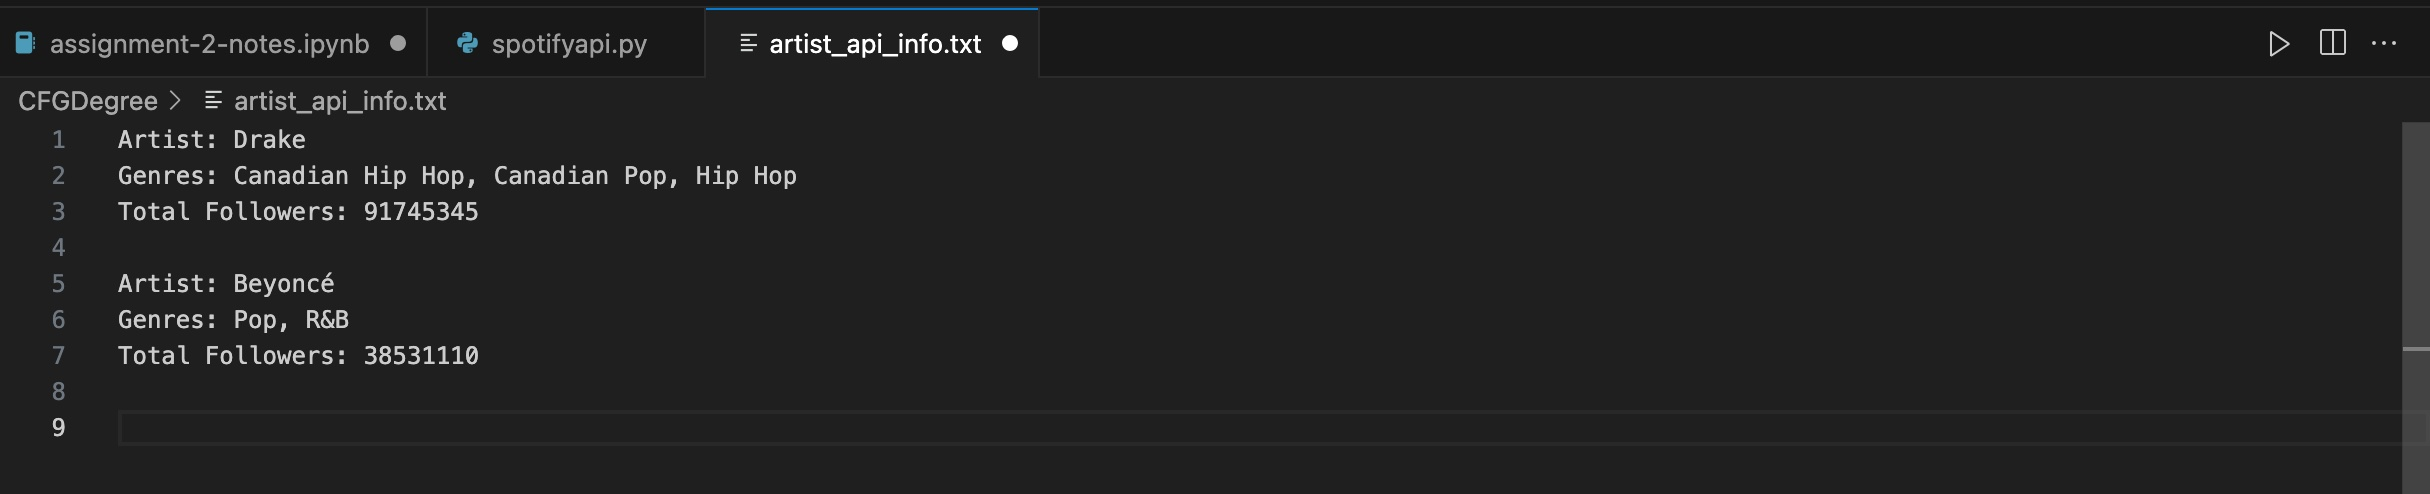